# Exploratory Data Analysis

In [544]:
# Importar las librerias o paquetes que necesitemos
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import colorConverter
import matplotlib.projections as proj
from mpl_toolkits.mplot3d.axis3d import Axis

In [293]:
data = pd.read_csv("data.csv")
print(data.shape)
data.head(1)

(4478, 52)


Power       I1        I2        I3        V1        V2         V3  \
0  9751.855054  7.82412  7.711217  7.659327  26.98123  26.98123  26.973406   

         V4        V5        V6        V7        V8         V9        V10  \
0  26.98123  26.98123  26.98123  26.98123  26.98123  25.676113  25.676113   

         V11        V12        V13        V14        V15        V16  \
0  25.668289  25.676113  25.676113  25.676113  25.676113  25.676113   

         V17        V18        V19        V20        V21        V22  \
0  26.671016  26.671016  26.671016  26.671016  26.671016  26.663305   

         V23        V24        V25        V26        V27        V28  \
0  26.671016  26.671016  26.671016  26.671016  26.671016  26.671016   

         V29        V30        V31        V32        V33        V34  \
0  25.299624  25.299624  25.299624  25.299624  26.994014  26.994014   

         V35        V36        V37        V38        V39        V40  \
0  26.994014  27.049819  26.994014  26.994014  25.923836  25.923836   

         V41        V42        V43        V44        V45        V46  \
0  25.916177  25.923836  25.923836  25.923836  25.923836  25.916177   

         V47        V48  
0  25.923836  25.923836

In [294]:
data.columns

Index(['Power', 'I1', 'I2', 'I3', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
       'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37',
       'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47',
       'V48'],
      dtype='object')

In [295]:
data.describe()

Power           I1           I2           I3           V1  \
count  4478.000000  4478.000000  4478.000000  4478.000000  4478.000000   
mean   8548.406364     6.827514     6.896482     6.608337    27.282597   
std    1241.973983     2.039082     1.790073     1.956146     1.730856   
min    6170.875545     0.000000     0.000000     0.000000    26.443160   
25%    9009.302242     7.498922     7.388015     6.619550    26.582026   
50%    9049.929132     7.512885     7.400250     7.339339    26.617965   
75%    9357.425934     7.523510     7.410271     7.350560    26.667098   
max    9751.855054     7.839610     7.736903     7.663922    32.894773   

                V2           V3           V4           V5           V6  \
count  4478.000000  4478.000000  4478.000000  4478.000000  4478.000000   
mean     27.278594    25.165644    26.546133    25.687662    26.549820   
std       1.732026     7.097594     4.172596     6.216940     4.172182   
min      26.438760    -0.813498     1.068002    -0.806746     1.072335   
25%      26.577610    26.557545    26.565811    26.558579    26.569769   
50%      26.613553    26.594093    26.601683    26.594880    26.605639   
75%      26.662693    26.634446    26.647068    26.637195    26.651030   
max      32.894773    32.894773    32.894773    32.894773    32.894773   

                V7           V8           V9          V10          V11  \
count  4478.000000  4478.000000  4478.000000  4478.000000  4478.000000   
mean     26.551080    26.548153    26.040294    26.046543    21.134884   
std       4.172041     4.172369     4.415720     4.416029    18.501392   
min       1.073729     1.070376    -0.800217    -0.800217  -157.617854   
25%      26.571122    26.567980    26.030805    26.037696    26.012755   
50%      26.606991    26.603850    26.064736    26.071617    26.050572   
75%      26.652384    26.649238    26.106128    26.113008    26.085365   
max      32.894773    32.894773    32.856710    32.856710    28.069292   

               V12          V13          V14          V15          V16  \
count  4478.000000  4478.000000  4478.000000  4478.000000  4478.000000   
mean     25.118789    25.118338    25.124738    25.123558    25.122752   
std       6.036232     6.036209     6.036526     6.036468     6.036428   
min      -0.800217    -0.800217    -0.800217    -0.800217    -0.800217   
25%      26.029348    26.028867    26.035677    26.034422    26.033565   
50%      26.063790    26.063309    26.070130    26.068873    26.068014   
75%      26.102047    26.101567    26.108372    26.107118    26.106261   
max      32.855800    32.855800    32.855800    32.855800    32.855800   

               V17          V18          V19          V20          V21  \
count  4478.000000  4478.000000  4478.000000  4478.000000  4478.000000   
mean     26.973064    26.972351    26.971240    26.969441    26.977092   
std       1.563428     1.563610     1.563893     1.564352     1.562400   
min      26.395289    26.394521    26.393324    26.391386    26.399627   
25%      26.464503    26.463737    26.462544    26.460610    26.468833   
50%      26.482626    26.481861    26.480670    26.478741    26.486951   
75%      26.507240    26.506474    26.505282    26.503351    26.511562   
max      32.857243    32.857243    32.857243    32.857243    32.857243   

               V22          V23          V24          V25          V26  \
count  4478.000000  4478.000000  4478.000000  4478.000000  4478.000000   
mean     21.953333    25.972538    25.972763    25.975824    25.925004   
std      18.120292     4.696663     4.696649     4.696448     4.698606   
min    -122.234110     0.456376     0.456630     0.460069     0.456951   
25%      26.447666    26.459256    26.459489    26.462663    26.457291   
50%      26.467669    26.477967    26.478201    26.481378    26.476462   
75%      26.487403    26.500528    26.500761    26.503933    26.497615   
max      28.189837    32.856317    32.856317    32.856317    32.856317   

           

# Power Graph

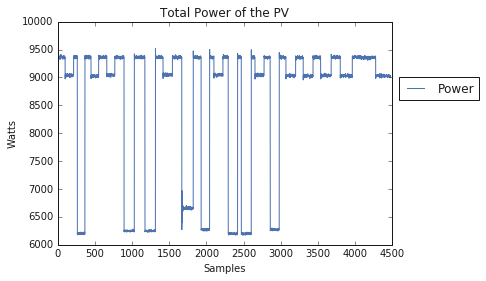

In [347]:
import matplotlib.pyplot as plt
plt.style.use('_classic_test')
%matplotlib inline
# fig name of the plot and ax is the data in the plot
fig, ax = plt.subplots()
#Separte the axis
x  = data.index
y1 = data['Power']
# Plot data
curve1 = ax.plot(x, y1, '-b', label='Power')
#ax.axis('equal')

# Add legend  - loc is a tuple specifying the bottom left corner
#ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
#ax.legend(loc='upper left', frameon=False)
#ax.legend(frameon=False, loc='lower center', ncol=2)
ax.legend(loc=(1.02, 0.65))

plt.xlabel('Samples')
plt.ylabel('Watts')
plt.title('Total Power of the PV')
plt.plot()
# Show plot
plt.show()

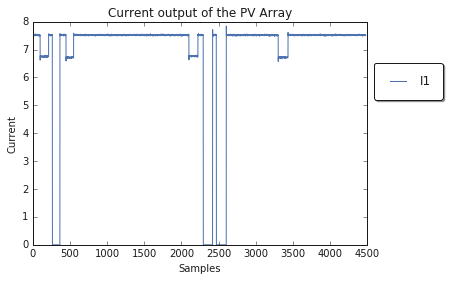

In [353]:
import matplotlib.pyplot as plt
plt.style.use('_classic_test')
%matplotlib inline
# Create figure
fig = plt.figure()
# Add subplot to figure
ax = fig.add_subplot(111)
#Separte the axis
x  = data.index
y1 = data['I1']
# Plot data
#styles = ['-', '--', '-.', ':']
curve1 = ax.plot(x, y1, '-b', label='I1')
# Set axis labels
ax.set_xlabel('Samples')
ax.set_ylabel('Current')
plt.title('Current output of the PV Array')

# Add legend - loc is a tuple specifying the bottom left corner
#ax.legend(loc='upper left', frameon=False)
#ax.legend(frameon=False, loc='lower center', ncol=2)
ax.legend(loc=(1.02, 0.65), fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.plot()
# Save plot
plt.show()

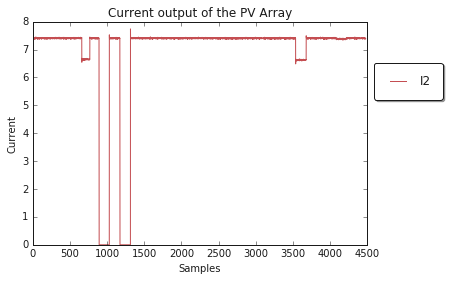

In [356]:
import matplotlib.pyplot as plt
plt.style.use('_classic_test')
%matplotlib inline
# Create figure
fig = plt.figure()
# Add subplot to figure
ax = fig.add_subplot(111)
#Separte the axis
x  = data.index
y2 = data['I2']
# Plot data
#styles = ['-', '--', '-.', ':']
curve2 = ax.plot(x, y2, '-r', label='I2')
# Set axis labels
ax.set_xlabel('Samples')
ax.set_ylabel('Current')
plt.title('Current output of the PV Array')

# Add legend - loc is a tuple specifying the bottom left corner
#ax.legend(loc='upper left', frameon=False)
#ax.legend(frameon=False, loc='lower center', ncol=2)
ax.legend(loc=(1.02, 0.65), fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.plot()
# Save plot
plt.show()

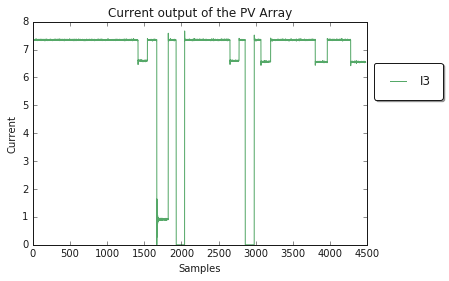

In [357]:
import matplotlib.pyplot as plt
plt.style.use('_classic_test')
%matplotlib inline
# Create figure
fig = plt.figure()
# Add subplot to figure
ax = fig.add_subplot(111)
#Separte the axis
x  = data.index
y3 = data['I3']
# Plot data
#styles = ['-', '--', '-.', ':']
curve3 = ax.plot(x, y3, '-g', label='I3')

# Set axis labels
ax.set_xlabel('Samples')
ax.set_ylabel('Current')
plt.title('Current output of the PV Array')

# Add legend - loc is a tuple specifying the bottom left corner
#ax.legend(loc='upper left', frameon=False)
#ax.legend(frameon=False, loc='lower center', ncol=2)
ax.legend(loc=(1.02, 0.65), fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.plot()
# Save plot
plt.show()

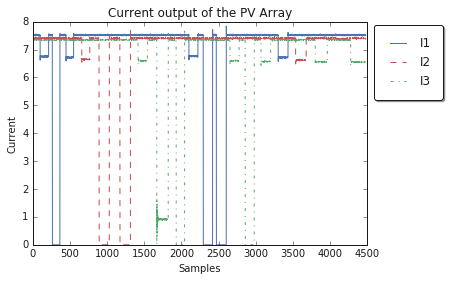

In [358]:
import matplotlib.pyplot as plt
plt.style.use('_classic_test')
%matplotlib inline
# Create figure
fig = plt.figure()
# Add subplot to figure
ax = fig.add_subplot(111)
#Separte the axis
x  = data.index
y1 = data['I1']
y2 = data['I2']
y3 = data['I3']
# Plot data
#styles = ['-', '--', '-.', ':']
curve1 = ax.plot(x, y1, '-b', label='I1')
curve2 = ax.plot(x, y2, '--r', label='I2')
curve3 = ax.plot(x, y3, '-.g', label='I3')

# Set axis labels
ax.set_xlabel('Samples')
ax.set_ylabel('Current')
plt.title('Current output of the PV Array')

# Add legend - loc is a tuple specifying the bottom left corner
#ax.legend(loc='upper left', frameon=False)
#ax.legend(frameon=False, loc='lower center', ncol=2)
ax.legend(loc=(1.02, 0.65), fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.plot()
# Save plot
plt.show()

# voltages

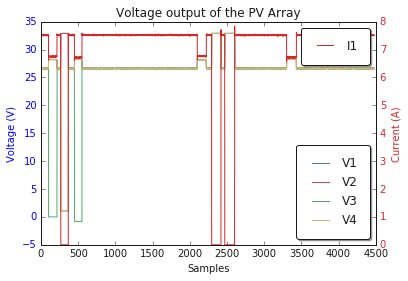

In [420]:
import matplotlib.pyplot as plt
plt.style.use('_classic_test')
%matplotlib inline
# Create figure
#fig = plt.figure()
# Add subplot to figure
fig, ax = plt.subplots()

#Separte the axis
x  = data.index
y1 = data['V1']
y2 = data['V2']
y3 = data['V3']
y4 = data['V4']

# Plot data
#styles = ['-', '--', '-.', ':']
curve1 = ax.plot(x, y1, '-b', label='V1')
curve2 = ax.plot(x, y2, '-r', label='V2')
curve3 = ax.plot(x, y3, '-g', label='V3')
curve4 = ax.plot(x, y4, '-y', label='V4')

ax2 =ax.twinx() # instantiate a second axes that shares the same x-axis
y5 = data['I1']
color = 'tab:red'
ax2.set_ylabel('Current (A)', color=color)  # we already handled the x-label with ax1
curve5 = ax2.plot(x, y5, color=color, label='I1')
ax2.tick_params(axis='y', labelcolor=color)


# Set axis labels
ax.set_xlabel('Samples')
ax.set_ylabel('Voltage (V)', color='blue')
ax.tick_params(axis='y', labelcolor='blue')
plt.title('Voltage output of the PV Array')

# Add legend - loc is a tuple specifying the bottom left corner
#ax.legend(loc='upper left', frameon=False) loc=(1.02, 0.65)
#ax.legend(frameon=False, loc='lower center', ncol=2)
ax.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax2.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.plot()
# Save plot
plt.savefig('my_plot.png')
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

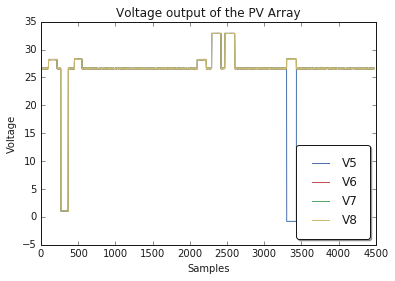

In [404]:
import matplotlib.pyplot as plt
plt.style.use('_classic_test')
%matplotlib inline
# Create figure
fig = plt.figure()
# Add subplot to figure
ax = fig.add_subplot(111)
#Separte the axis
x  = data.index
y1 = data['V5']
y2 = data['V6']
y3 = data['V7']
y4 = data['V8']
# Plot data
#styles = ['-', '--', '-.', ':']
curve1 = ax.plot(x, y1, '-b', label='V5')
curve2 = ax.plot(x, y2, '-r', label='V6')
curve3 = ax.plot(x, y3, '-g', label='V7')
curve4 = ax.plot(x, y4, '-y', label='V8')
# Set axis labels
ax.set_xlabel('Samples')
ax.set_ylabel('Voltage')
plt.title('Voltage output of the PV Array')

# Add legend - loc is a tuple specifying the bottom left corner
#ax.legend(loc='upper left', frameon=False) loc=(1.02, 0.65)
#ax.legend(frameon=False, loc='lower center', ncol=2)
ax.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.plot()
# Save plot
plt.savefig('my_plot.png')
plt.show()

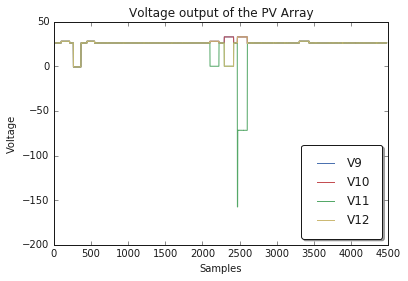

In [406]:
import matplotlib.pyplot as plt
plt.style.use('_classic_test')
%matplotlib inline
# Create figure
fig = plt.figure()
# Add subplot to figure
ax = fig.add_subplot(111)
#Separte the axis
x  = data.index
y1 = data['V9']
y2 = data['V10']
y3 = data['V11']
y4 = data['V12']
# Plot data
#styles = ['-', '--', '-.', ':']
curve1 = ax.plot(x, y1, '-b', label='V9')
curve2 = ax.plot(x, y2, '-r', label='V10')
curve3 = ax.plot(x, y3, '-g', label='V11')
curve4 = ax.plot(x, y4, '-y', label='V12')
# Set axis labels
ax.set_xlabel('Samples')
ax.set_ylabel('Voltage')
plt.title('Voltage output of the PV Array')

# Add legend - loc is a tuple specifying the bottom left corner
#ax.legend(loc='upper left', frameon=False) loc=(1.02, 0.65)
#ax.legend(frameon=False, loc='lower center', ncol=2)
ax.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.plot()
# Save plot
plt.savefig('my_plot.png')
plt.show()

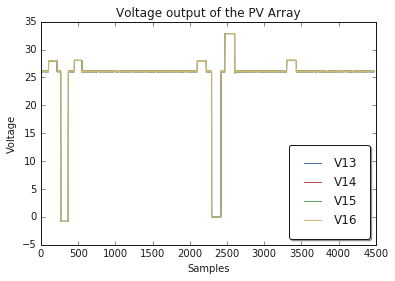

In [407]:
import matplotlib.pyplot as plt
plt.style.use('_classic_test')
%matplotlib inline
# Create figure
fig = plt.figure()
# Add subplot to figure
ax = fig.add_subplot(111)
#Separte the axis
x  = data.index
y1 = data['V13']
y2 = data['V14']
y3 = data['V15']
y4 = data['V16']
# Plot data
#styles = ['-', '--', '-.', ':']
curve1 = ax.plot(x, y1, '-b', label='V13')
curve2 = ax.plot(x, y2, '-r', label='V14')
curve3 = ax.plot(x, y3, '-g', label='V15')
curve4 = ax.plot(x, y4, '-y', label='V16')
# Set axis labels
ax.set_xlabel('Samples')
ax.set_ylabel('Voltage')
plt.title('Voltage output of the PV Array')

# Add legend - loc is a tuple specifying the bottom left corner
#ax.legend(loc='upper left', frameon=False) loc=(1.02, 0.65)
#ax.legend(frameon=False, loc='lower center', ncol=2)
ax.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.plot()
# Save plot
plt.savefig('my_plot.png')
plt.show()

# Find Max number of Clusters

In [506]:
# Multiple row and column selections using iloc and DataFrame
#data.iloc[0:5] # first five rows of dataframe
#data.iloc[:, 0:2] # first two columns of data frame with all rows
#data.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.
#data.iloc[0:5, 5:8] # first 5 rows and 5th, 6th, 7th columns of data frame (county -> phone1).
x = data.iloc[:, [0,1,4]]
x.describe()

Power           I1           V1
count  4478.000000  4478.000000  4478.000000
mean   8548.406364     6.827514    27.282597
std    1241.973983     2.039082     1.730856
min    6170.875545     0.000000    26.443160
25%    9009.302242     7.498922    26.582026
50%    9049.929132     7.512885    26.617965
75%    9357.425934     7.523510    26.667098
max    9751.855054     7.839610    32.894773

# The Elbow Method

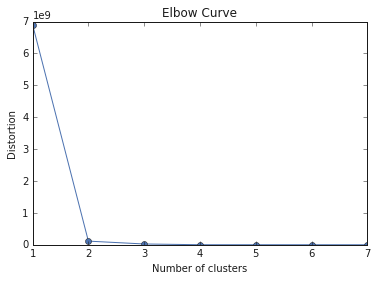

In [432]:
#Extract the 3 dimension (Voltage, current and power)
x = data.iloc[:, [0,1,6]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()

# K-means clustering using ```scikit-learn```

 Using the preceding code, we set the number of desired ```clusters``` to 3. We set ```n_init=10``` to run the k-means clustering algorithms 10 times independently with different random centroids to choose the final model as the one with the lowest SSE (Sum of Squared Errors) or distorsion. Via the ```max_iter parameter```, we specify the maximum number of iterations for each single run (here, 300).

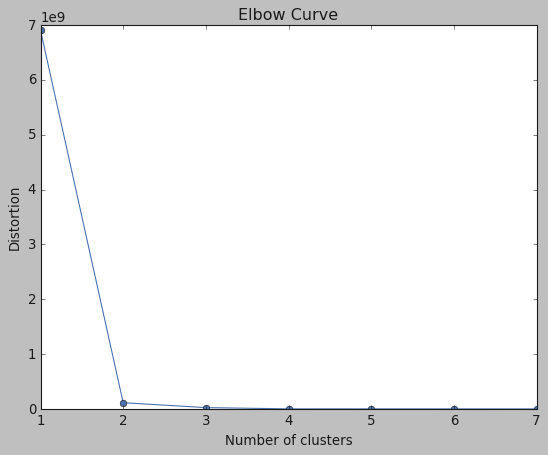

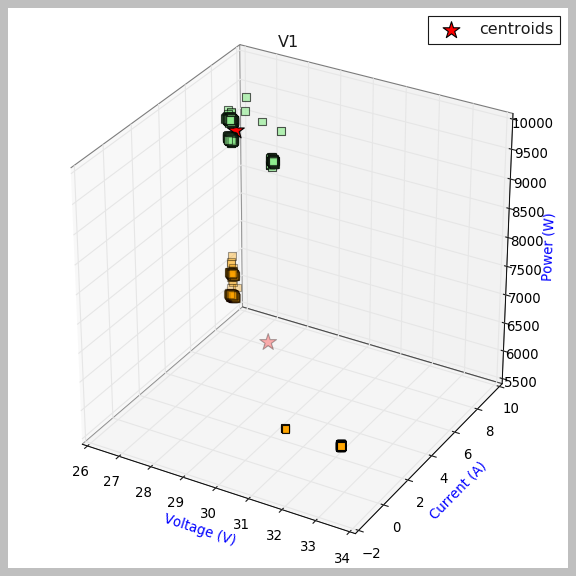

In [570]:
x = data.iloc[:, [0,1,4]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V1')
plt.show()

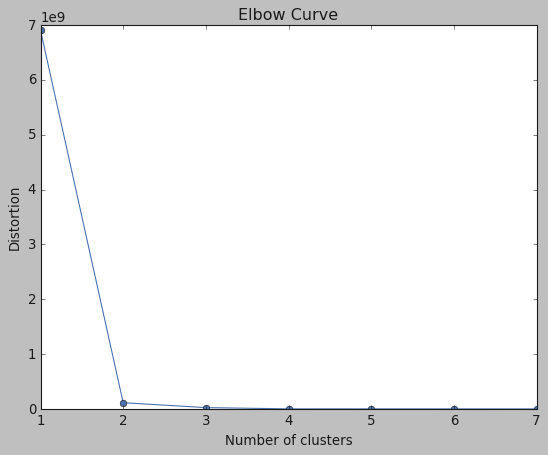

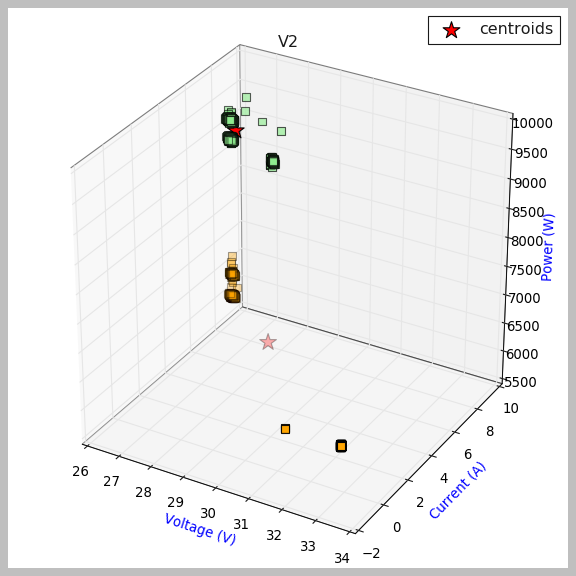

In [602]:
x = data.iloc[:, [0,1,5]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V2')
plt.show()

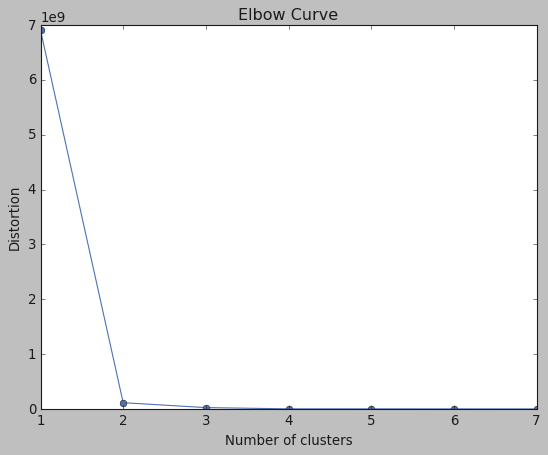

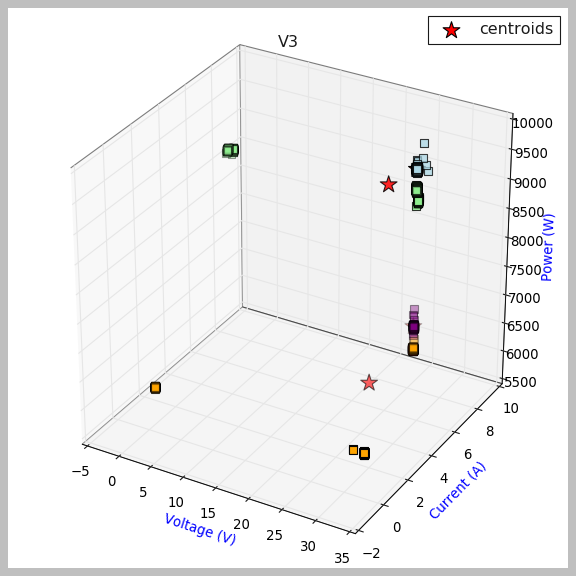

In [603]:
x = data.iloc[:, [0,1,6]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V3')
plt.show()

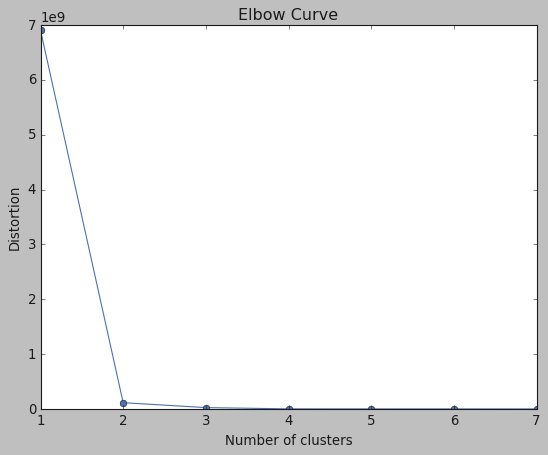

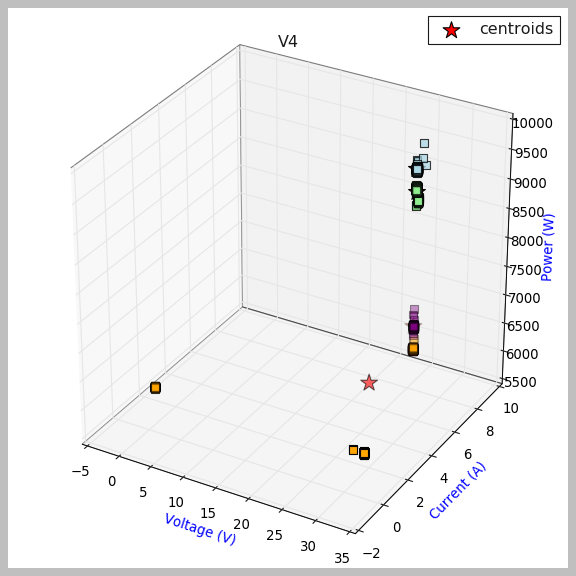

In [604]:
x = data.iloc[:, [0,1,7]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V4')
plt.show()

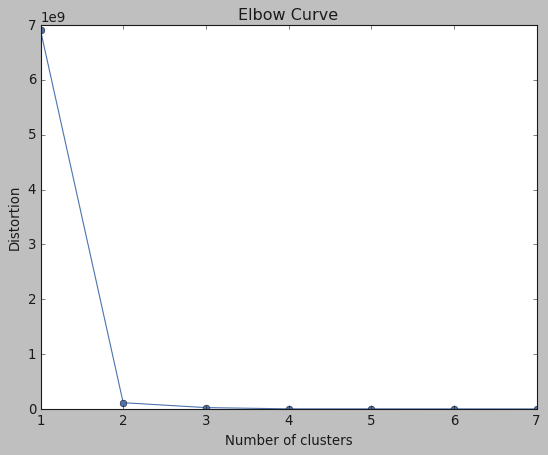

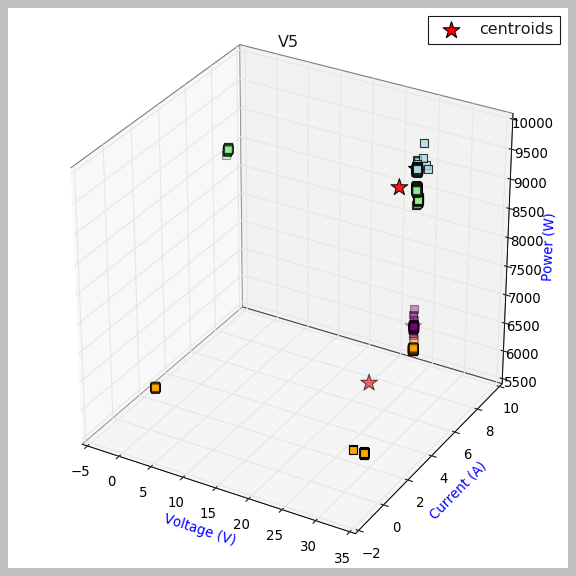

In [605]:
x = data.iloc[:, [0,1,8]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V5')
plt.show()

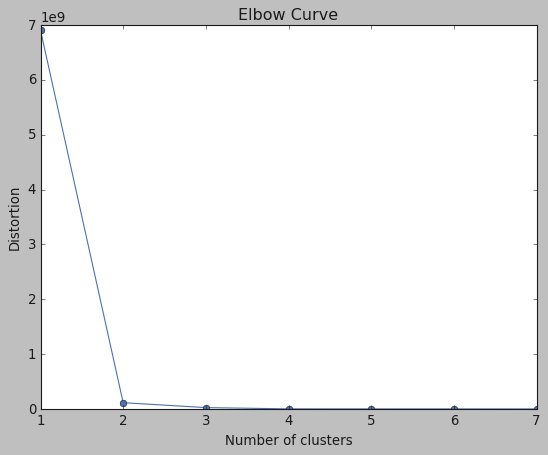

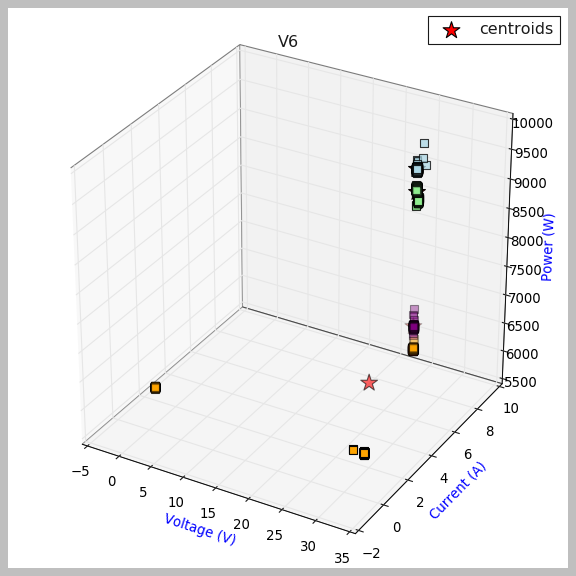

In [606]:
x = data.iloc[:, [0,1,9]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V6')
plt.show()

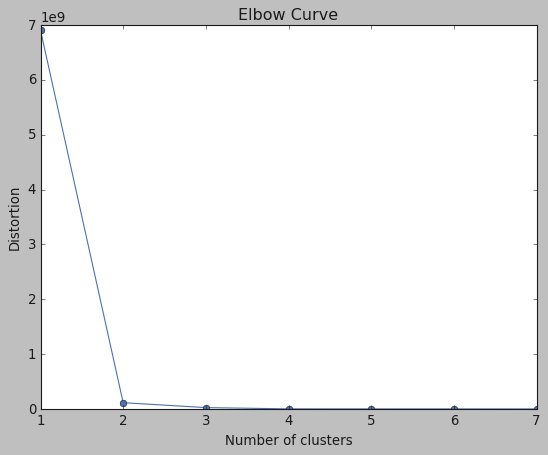

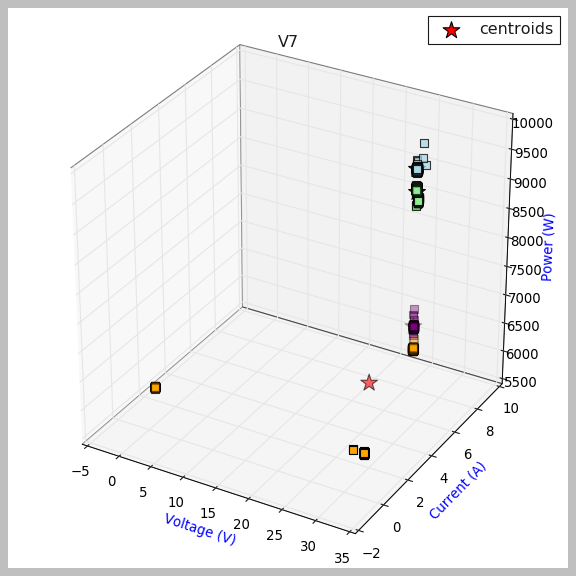

In [607]:
x = data.iloc[:, [0,1,10]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V7')
plt.show()

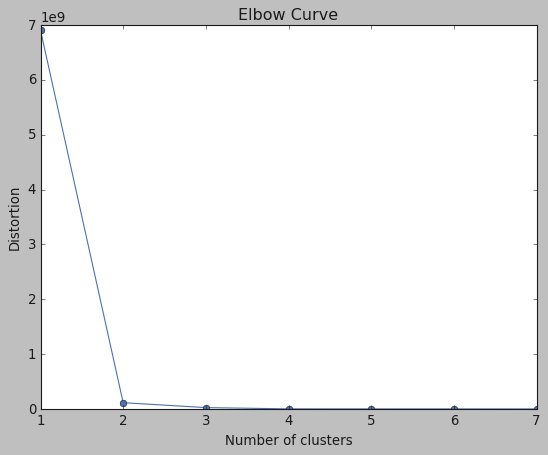

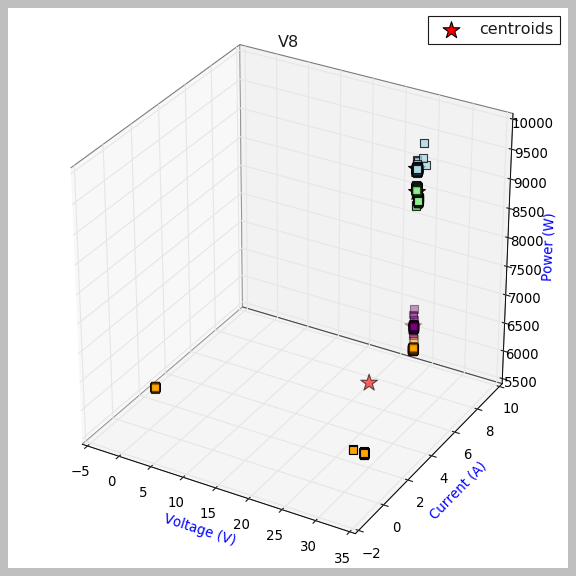

In [608]:
x = data.iloc[:, [0,1,11]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V8')
plt.show()

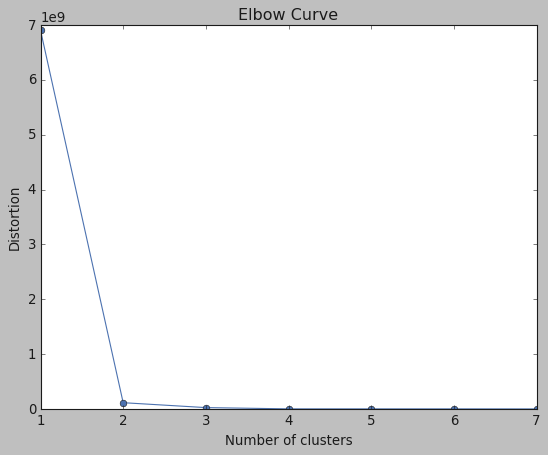

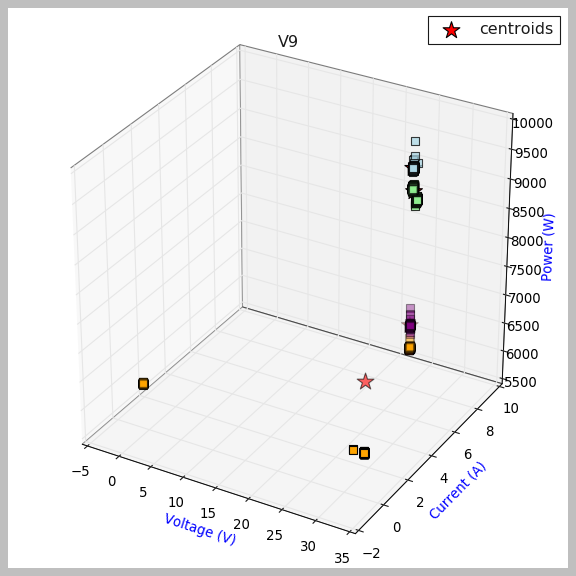

In [609]:
x = data.iloc[:, [0,1,12]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V9')
plt.show()

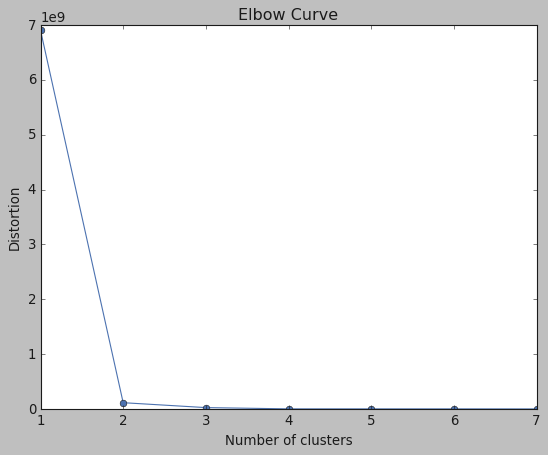

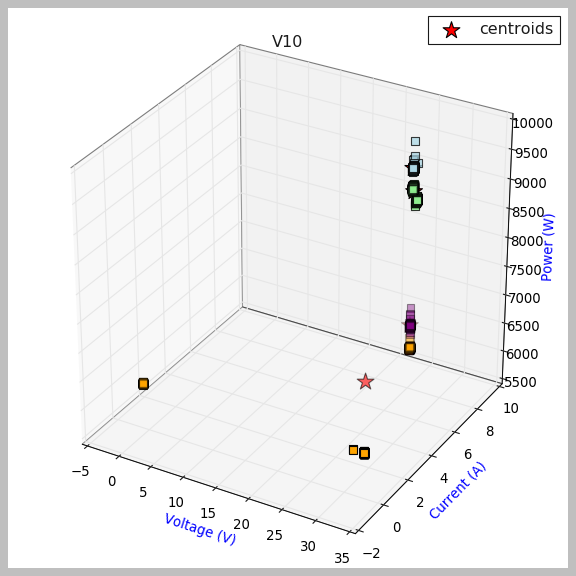

In [610]:
x = data.iloc[:, [0,1,13]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V10')
plt.show()

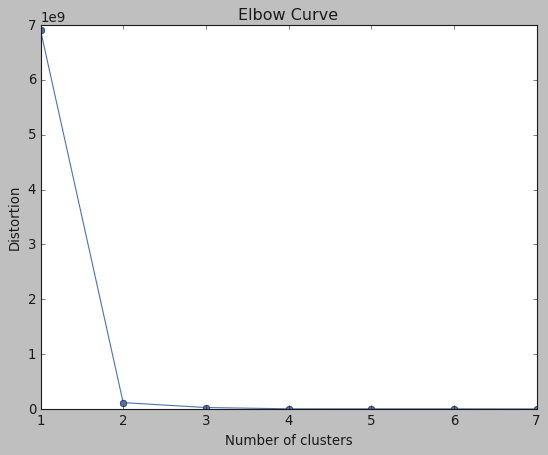

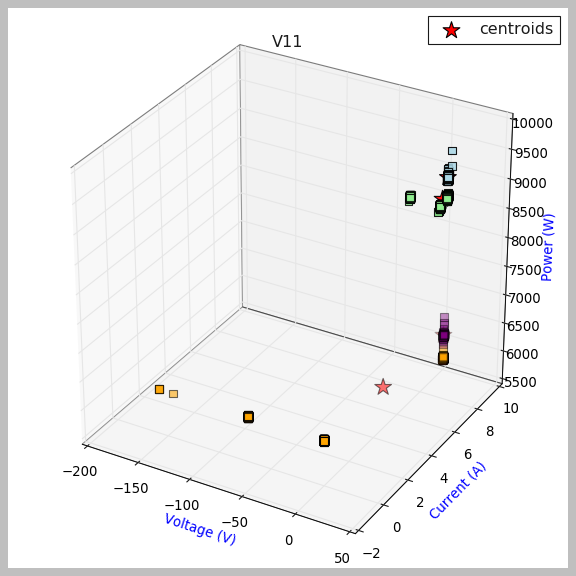

In [611]:
x = data.iloc[:, [0,1,14]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V11')
plt.show()

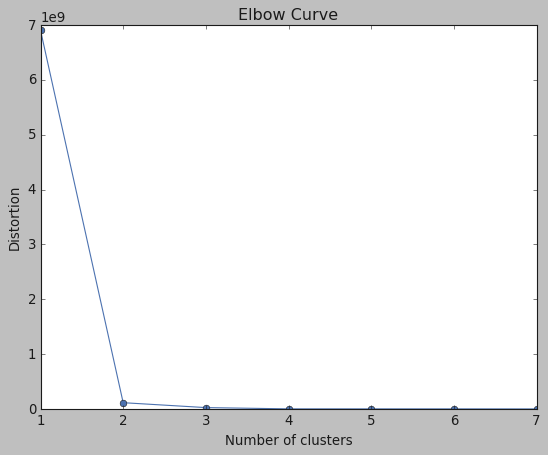

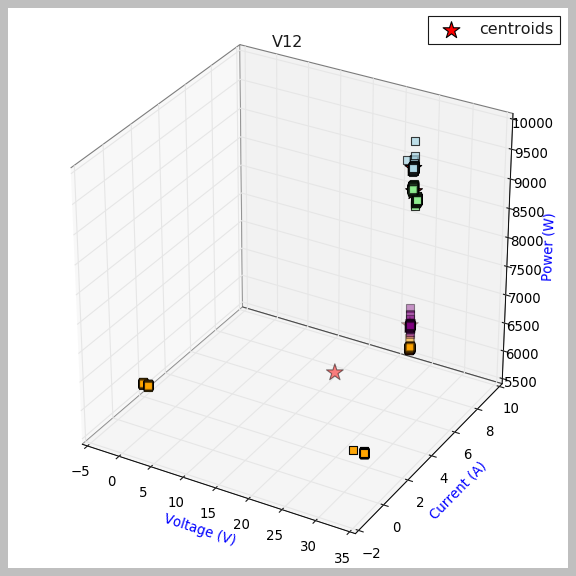

In [612]:
x = data.iloc[:, [0,1,15]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V12')
plt.show()

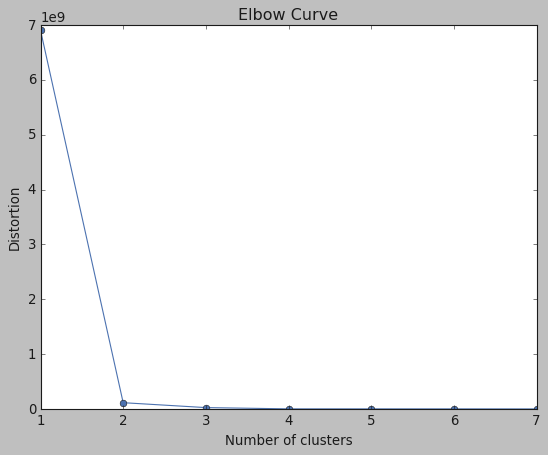

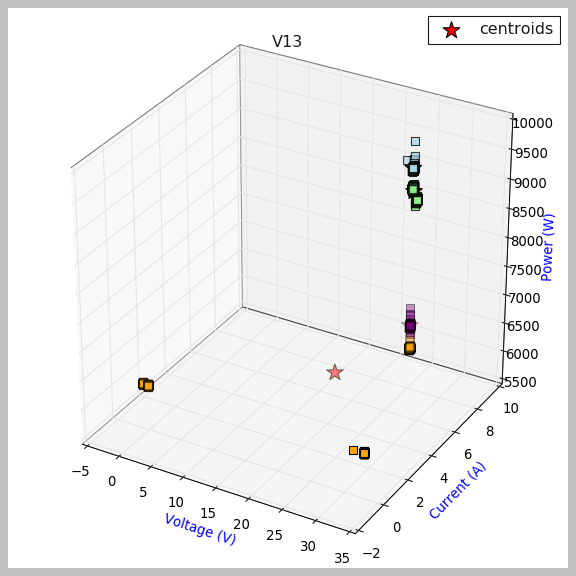

In [613]:
x = data.iloc[:, [0,1,16]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V13')
plt.show()

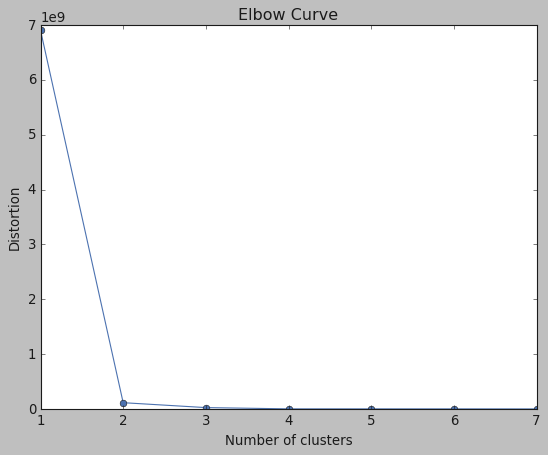

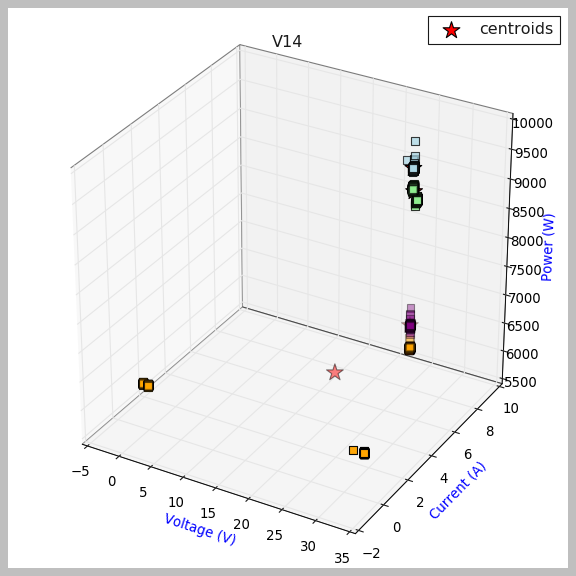

In [617]:
x = data.iloc[:, [0,1,17]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V14')
plt.show()

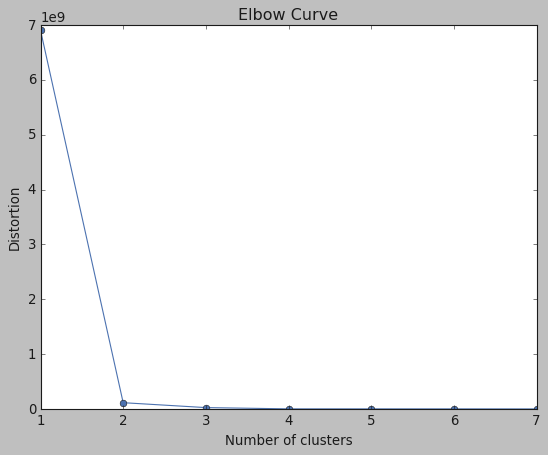

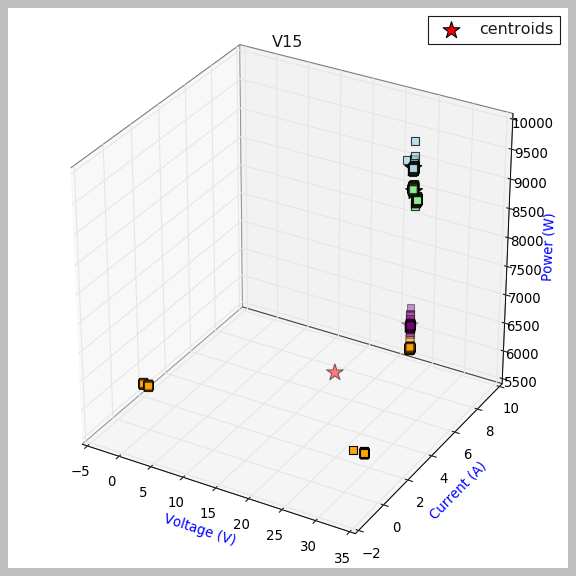

In [618]:
x = data.iloc[:, [0,1,18]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V15')
plt.show()

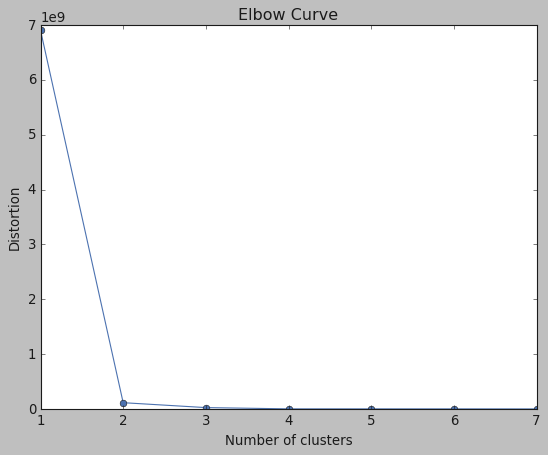

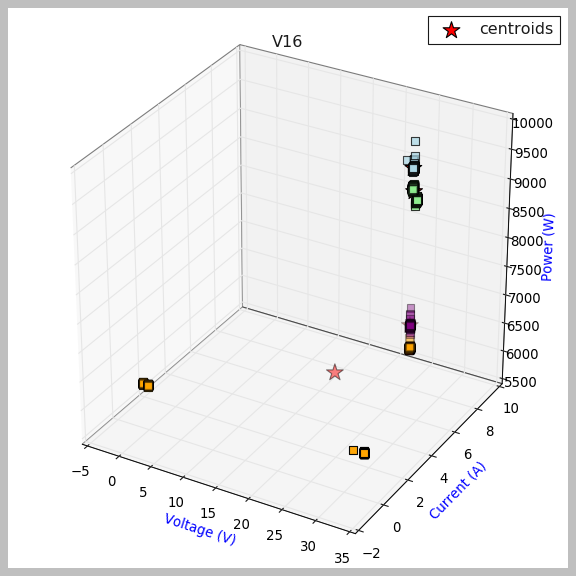

In [619]:
x = data.iloc[:, [0,1,19]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V16')
plt.show()

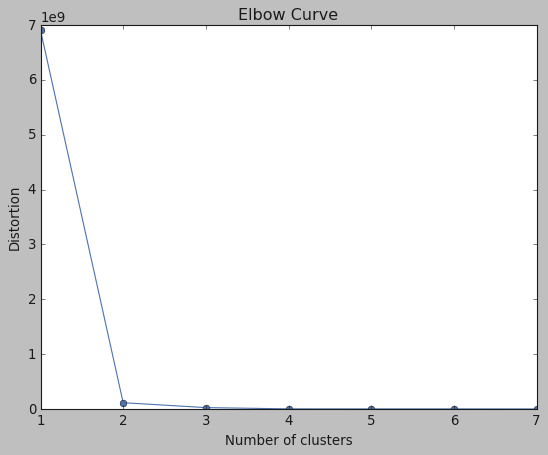

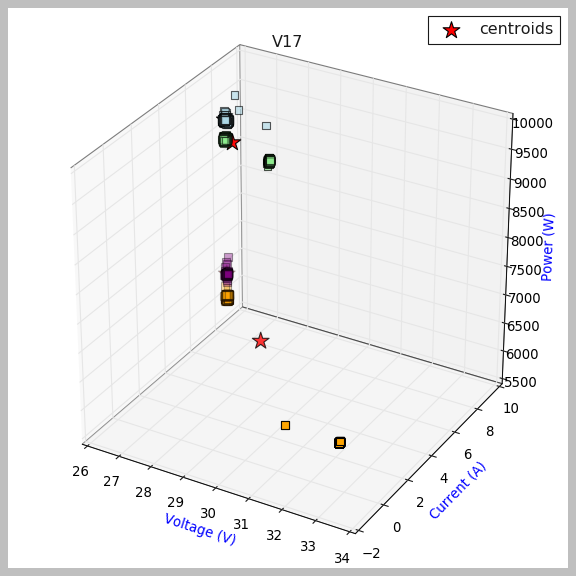

In [620]:
x = data.iloc[:, [0,2,20]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V17')
plt.show()

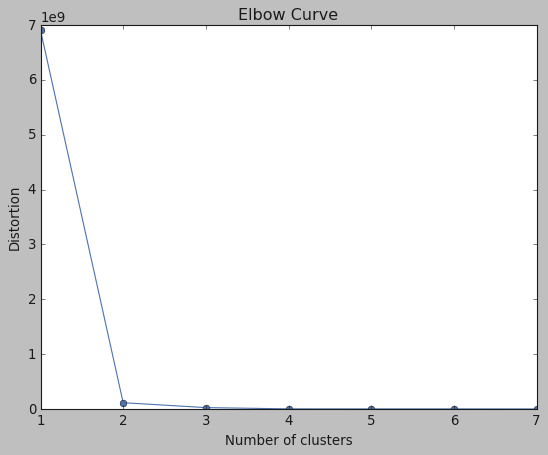

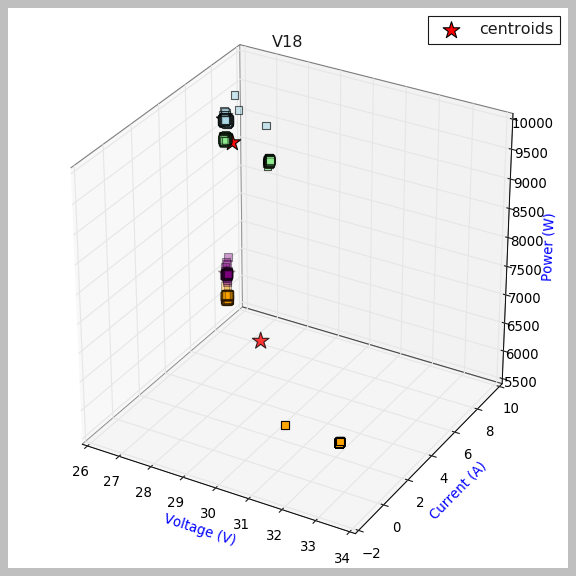

In [625]:
x = data.iloc[:, [0,2,21]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V18')
plt.show()

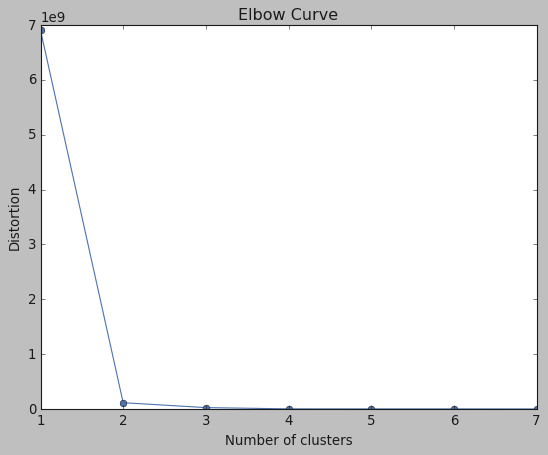

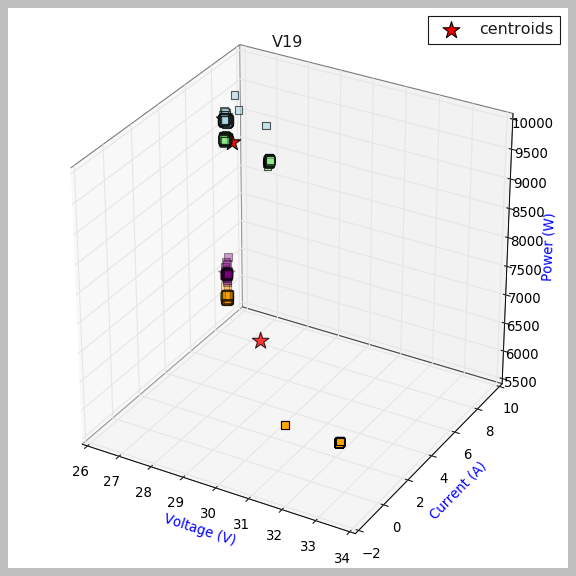

In [626]:
x = data.iloc[:, [0,2,22]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V19')
plt.show()

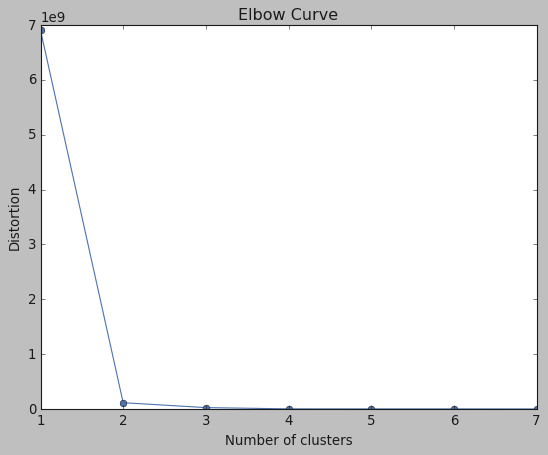

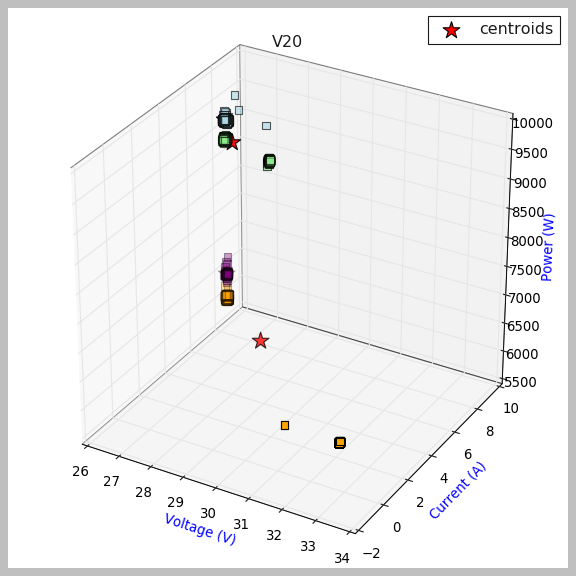

In [627]:
x = data.iloc[:, [0,2,23]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V20')
plt.show()

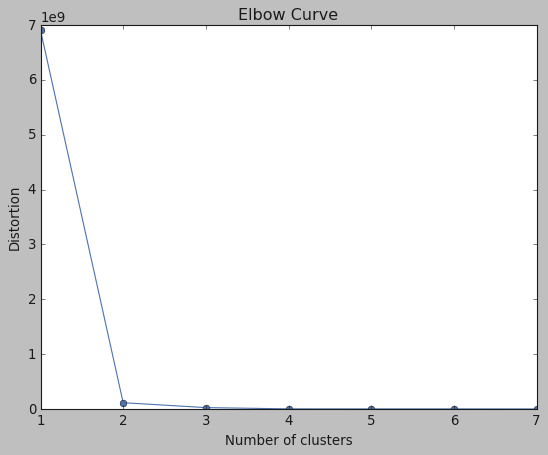

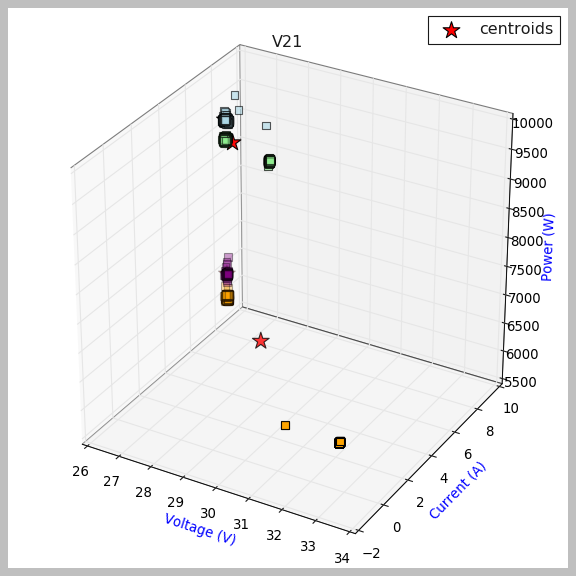

In [628]:
x = data.iloc[:, [0,2,24]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V21')
plt.show()

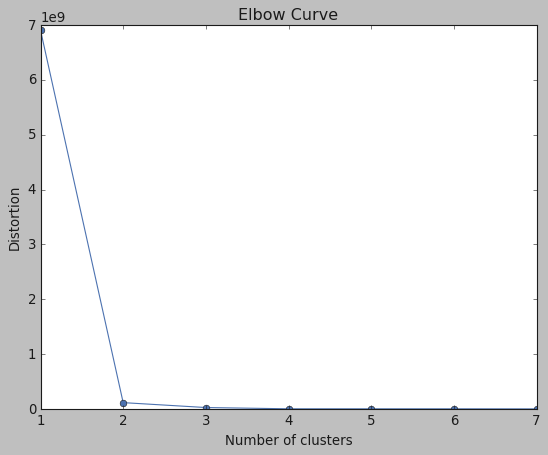

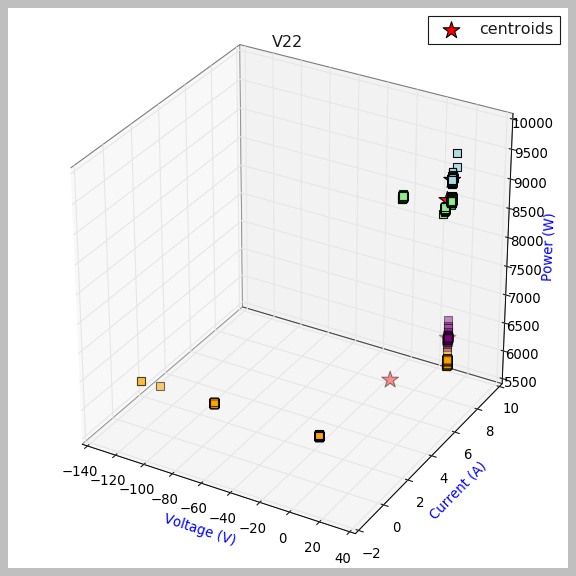

In [629]:
x = data.iloc[:, [0,2,25]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V22')
plt.show()

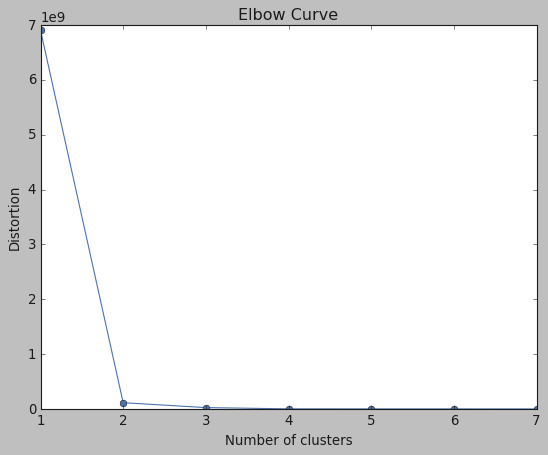

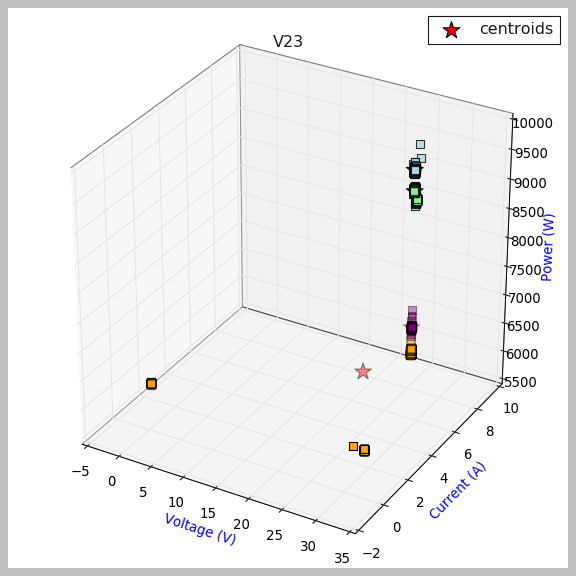

In [630]:
x = data.iloc[:, [0,2,26]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V23')
plt.show()

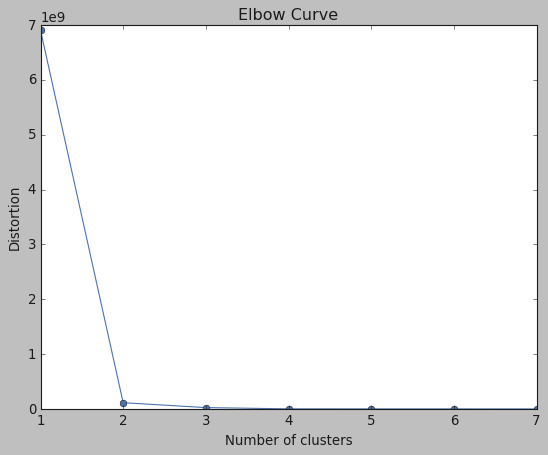

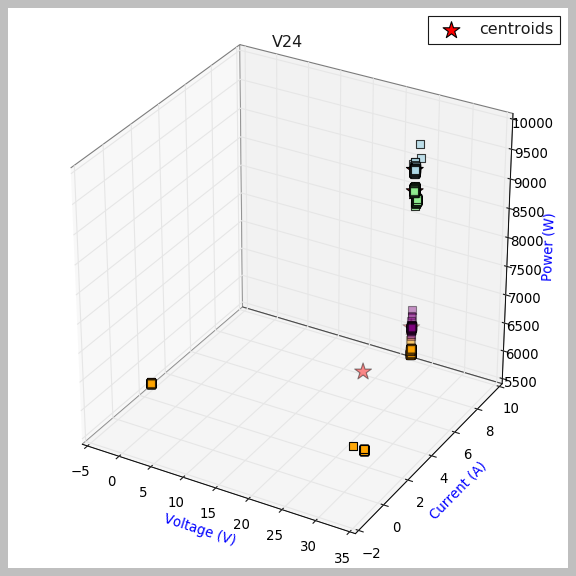

In [631]:
x = data.iloc[:, [0,2,27]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V24')
plt.show()

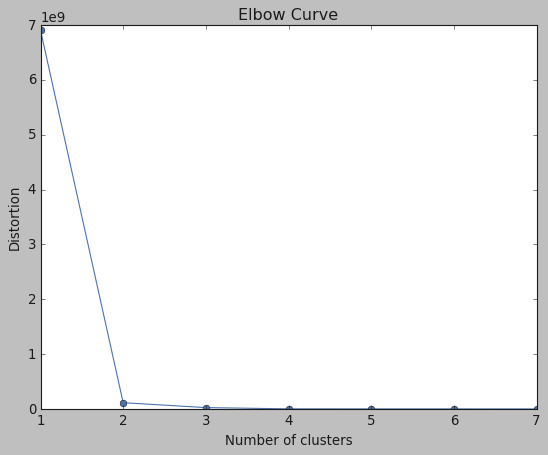

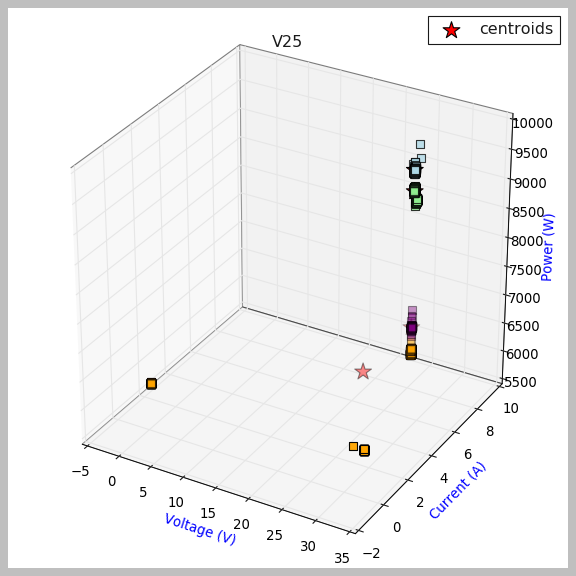

In [632]:
x = data.iloc[:, [0,2,28]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V25')
plt.show()

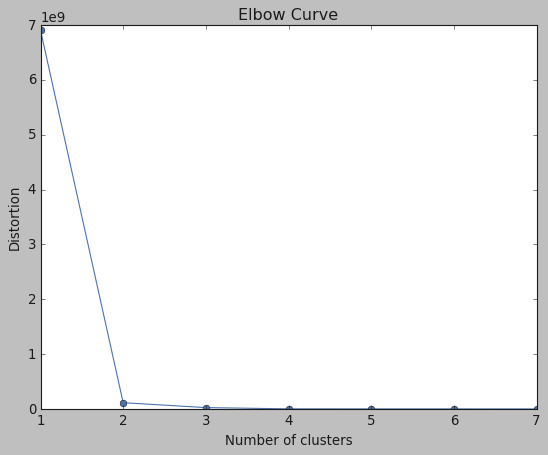

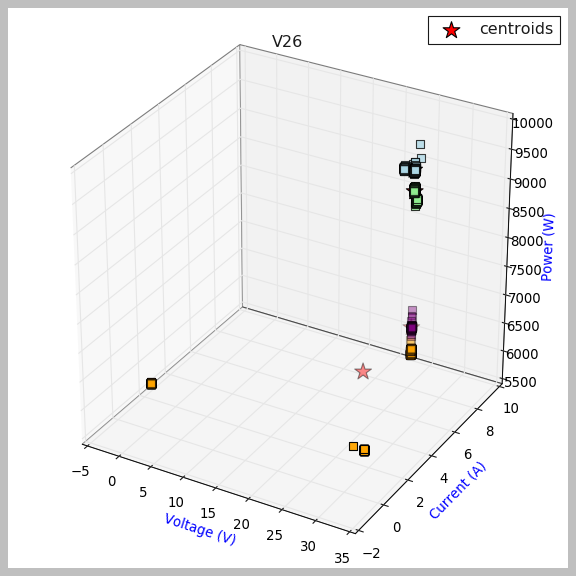

In [633]:
x = data.iloc[:, [0,2,29]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V26')
plt.show()

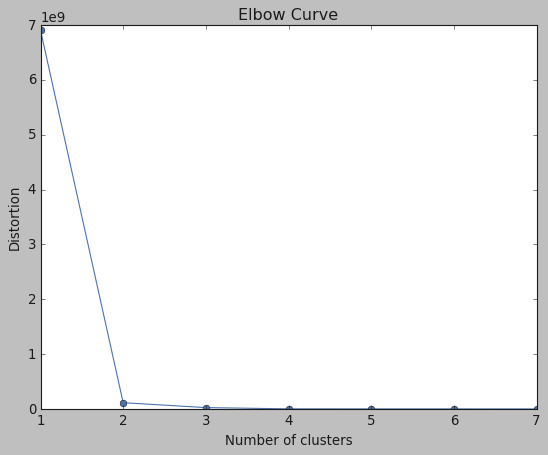

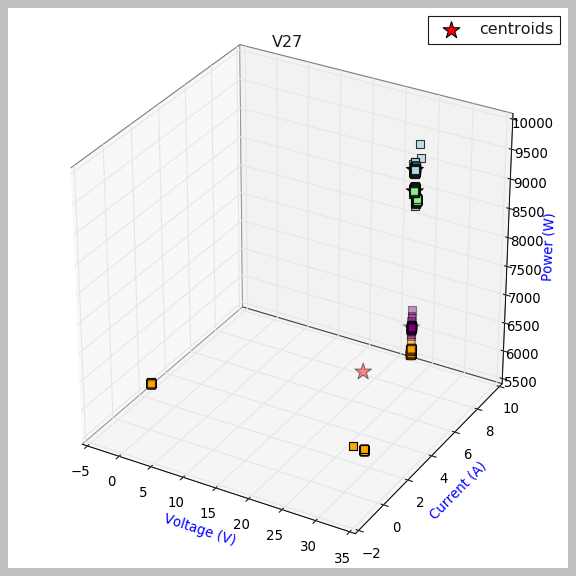

In [634]:
x = data.iloc[:, [0,2,30]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V27')
plt.show()

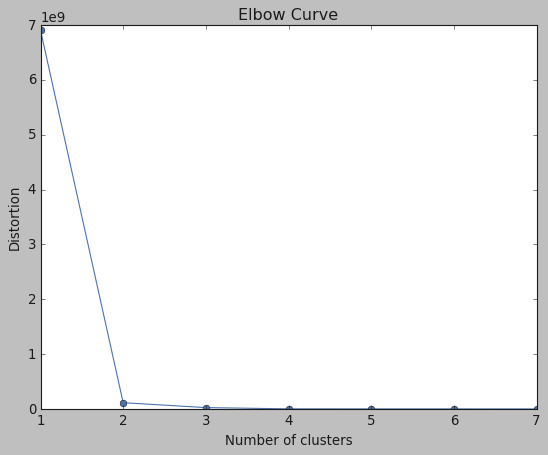

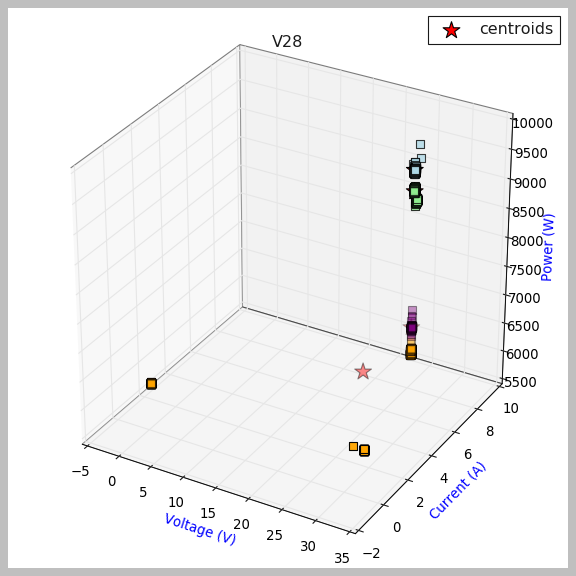

In [635]:
x = data.iloc[:, [0,2,31]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V28')
plt.show()

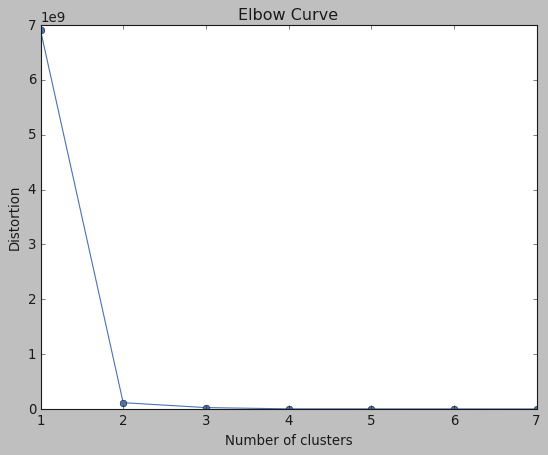

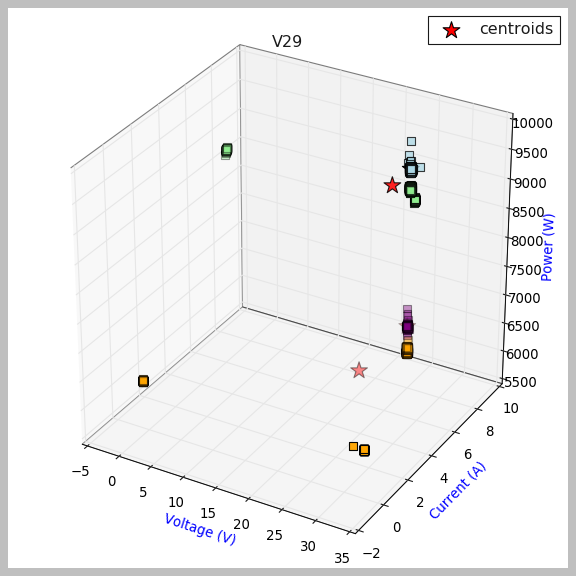

In [636]:
x = data.iloc[:, [0,2,32]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V29')
plt.show()

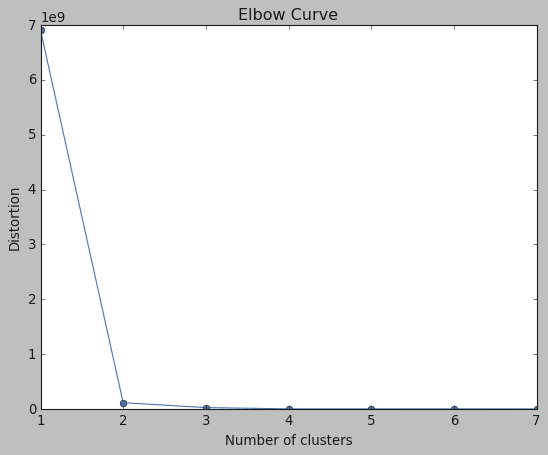

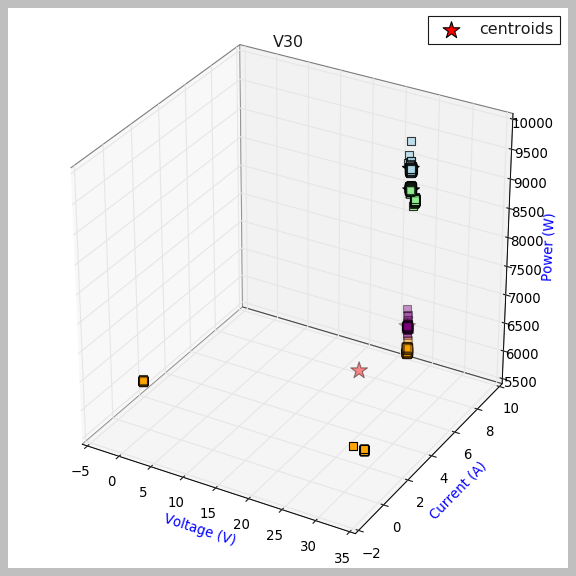

In [637]:
x = data.iloc[:, [0,2,33]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V30')
plt.show()

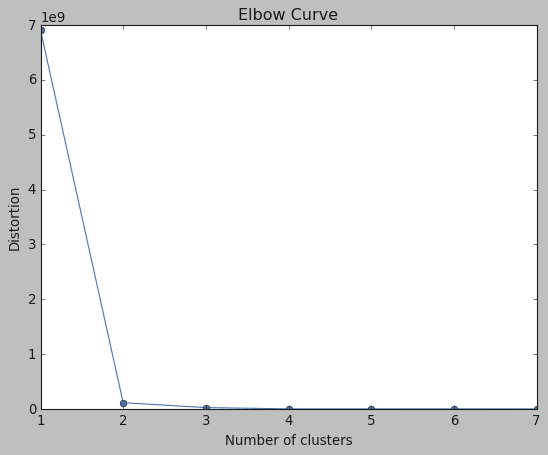

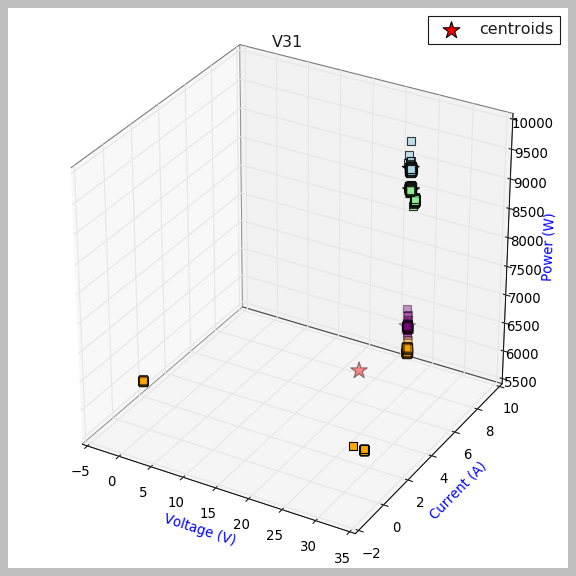

In [638]:
x = data.iloc[:, [0,2,34]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V31')
plt.show()

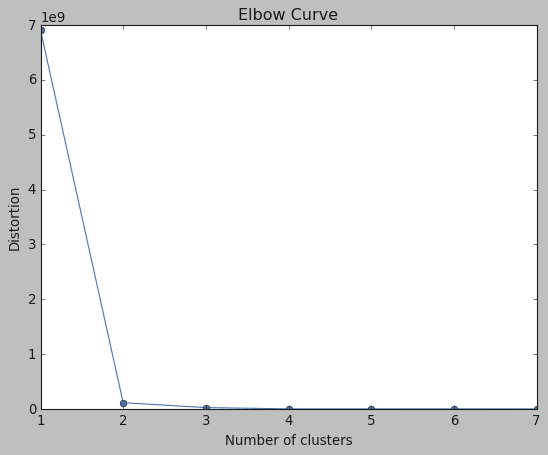

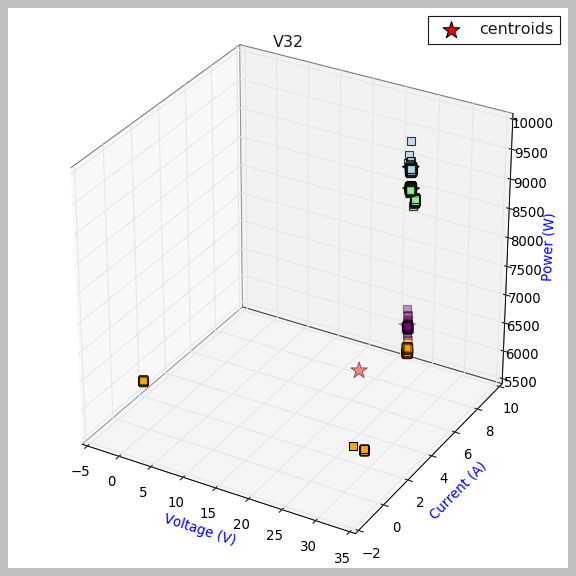

In [621]:
x = data.iloc[:, [0,2,35]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V32')
plt.show()

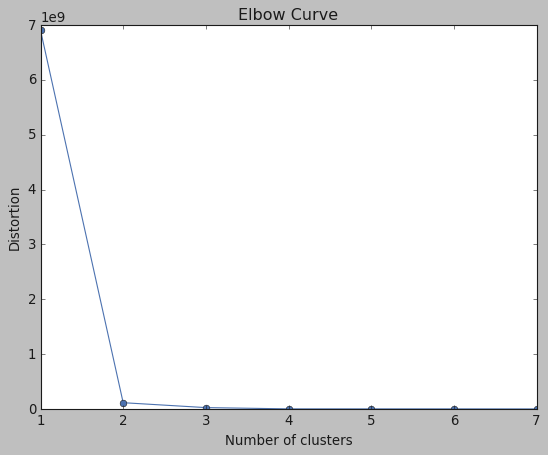

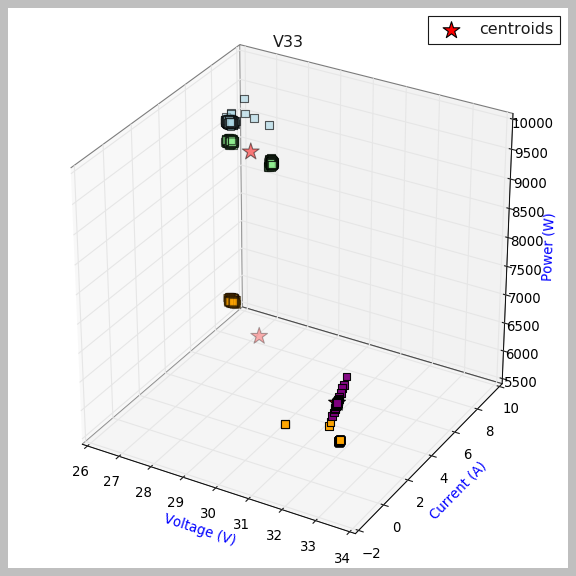

In [647]:
x = data.iloc[:, [0,3,36]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V33')
plt.show()

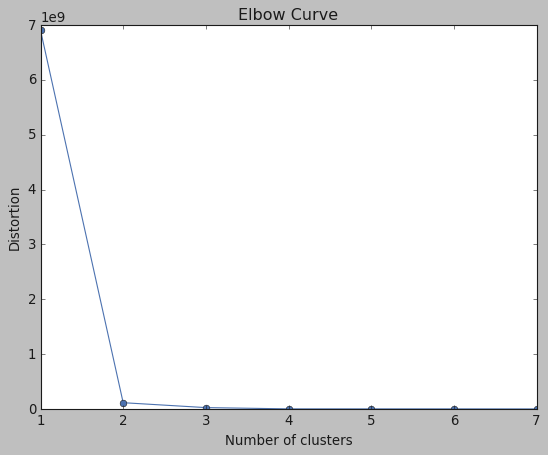

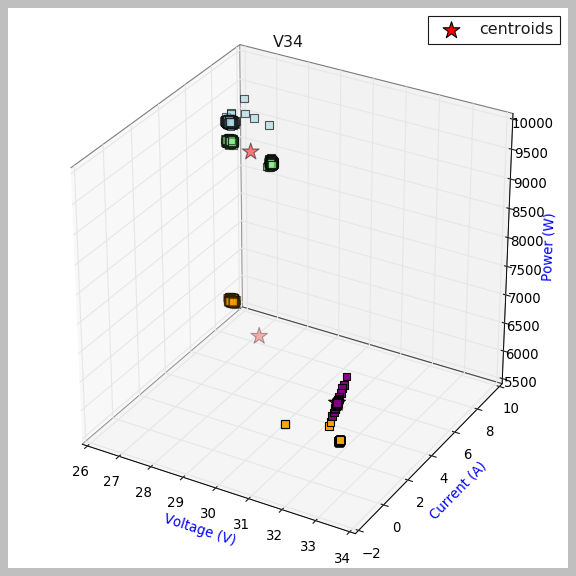

In [639]:
x = data.iloc[:, [0,3,37]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V34')
plt.show()

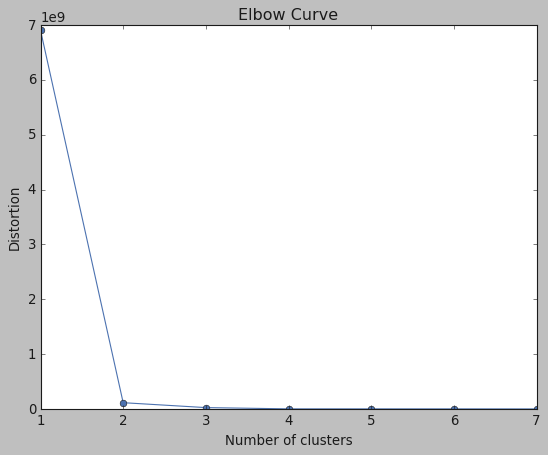

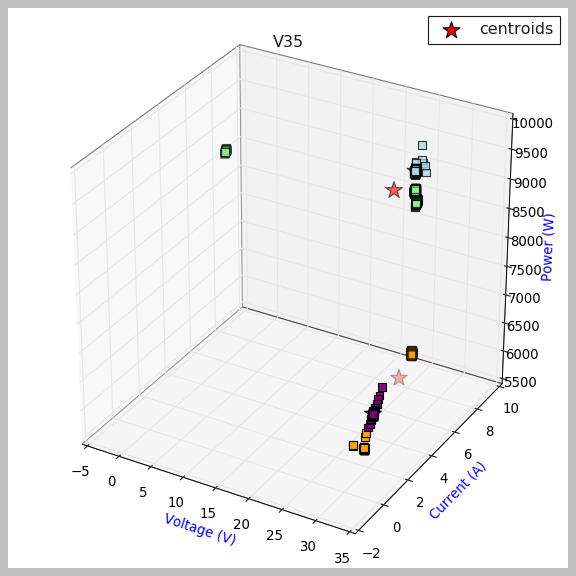

In [640]:
x = data.iloc[:, [0,3,38]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V35')
plt.show()

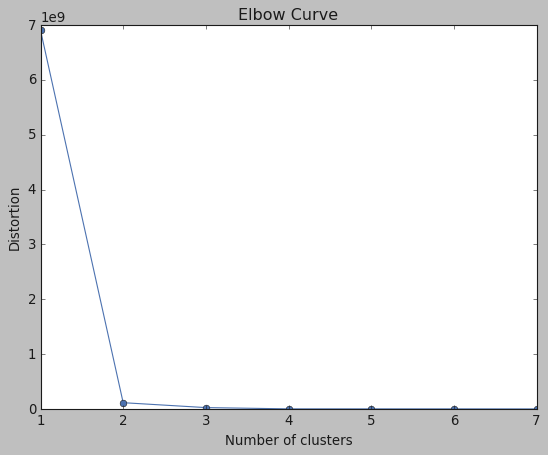

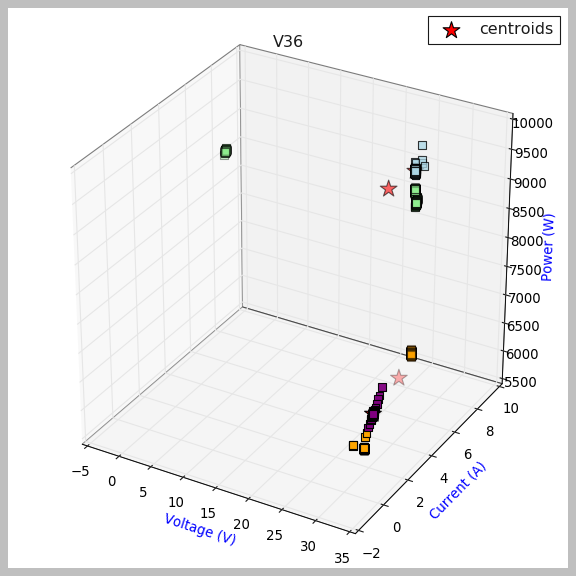

In [641]:
x = data.iloc[:, [0,3,39]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V36')
plt.show()

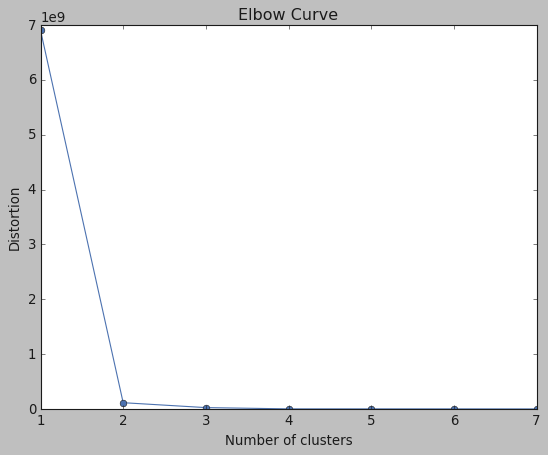

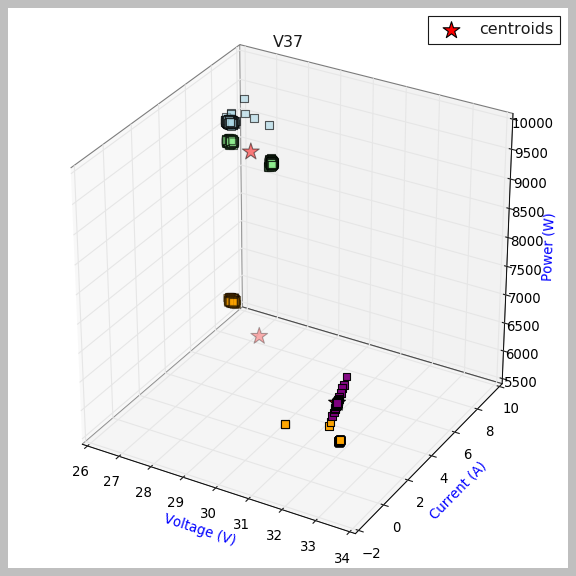

In [642]:
x = data.iloc[:, [0,3,40]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V37')
plt.show()

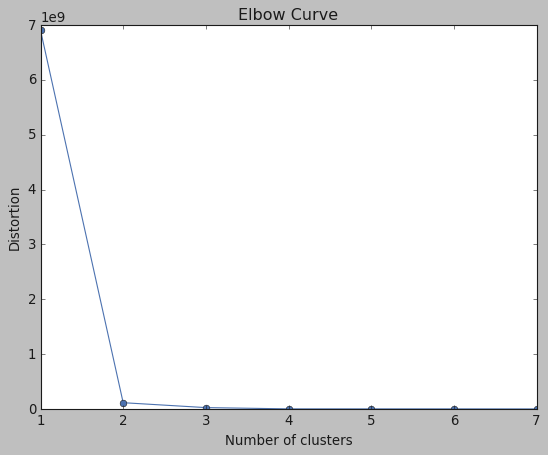

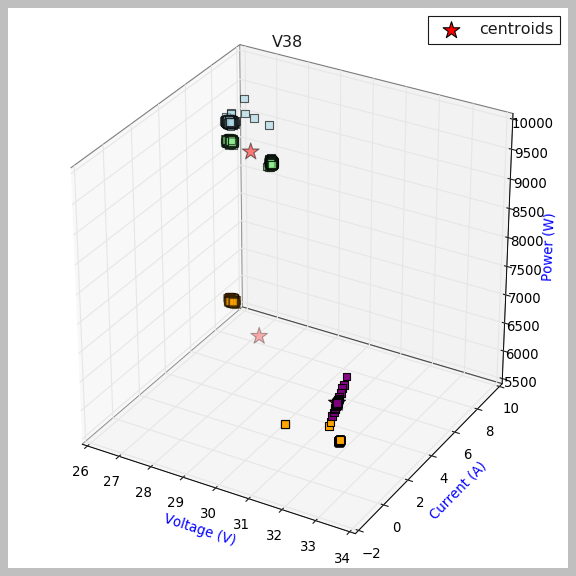

In [643]:
x = data.iloc[:, [0,3,41]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V38')
plt.show()

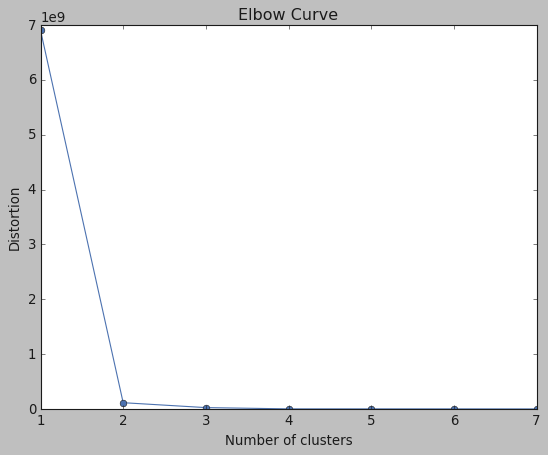

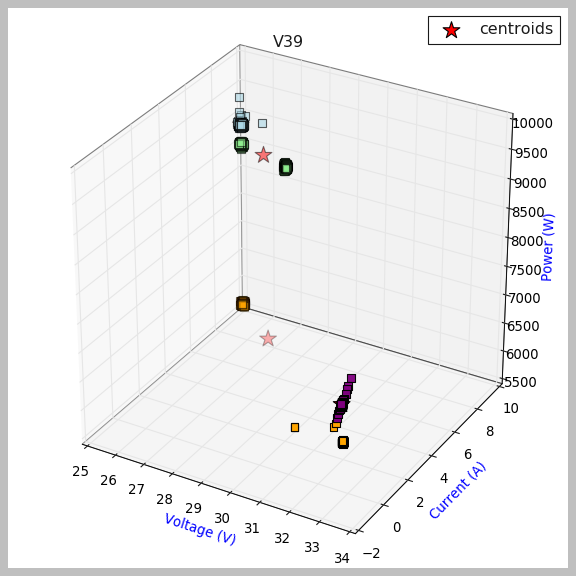

In [644]:
x = data.iloc[:, [0,3,42]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V39')
plt.show()

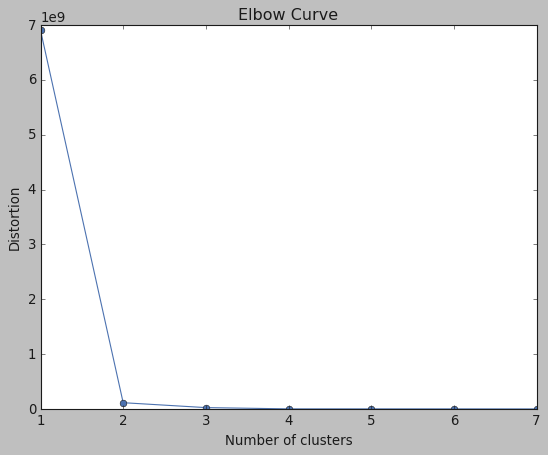

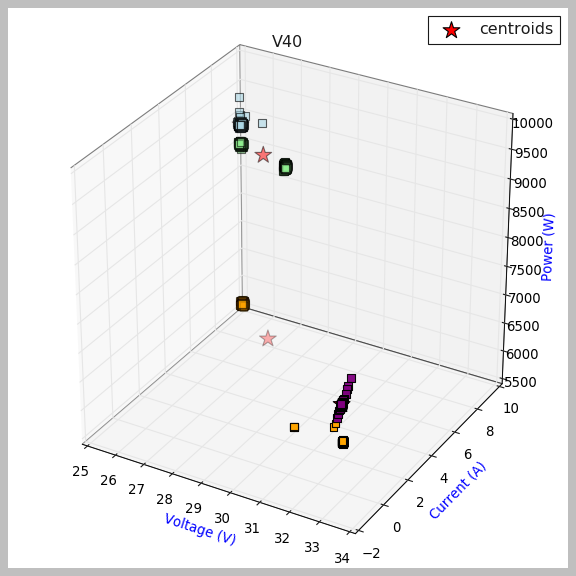

In [645]:
x = data.iloc[:, [0,3,43]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V40')
plt.show()

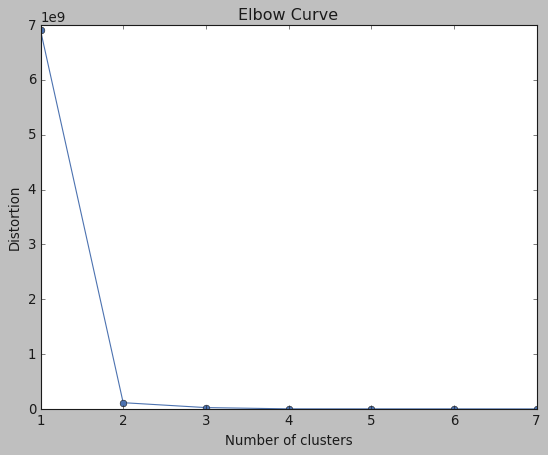

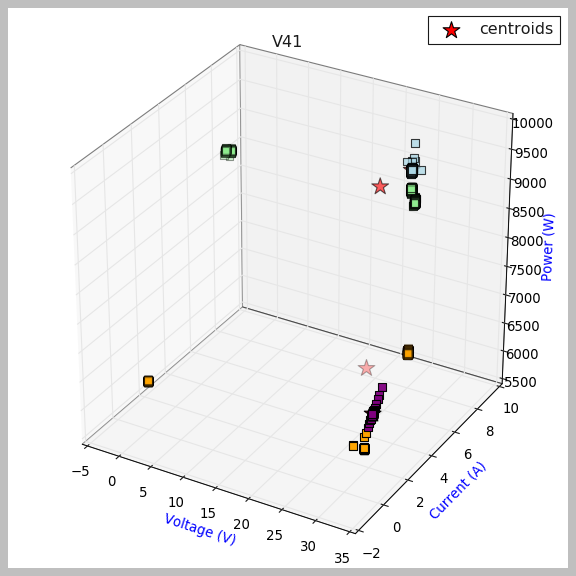

In [646]:
x = data.iloc[:, [0,3,44]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V41')
plt.show()

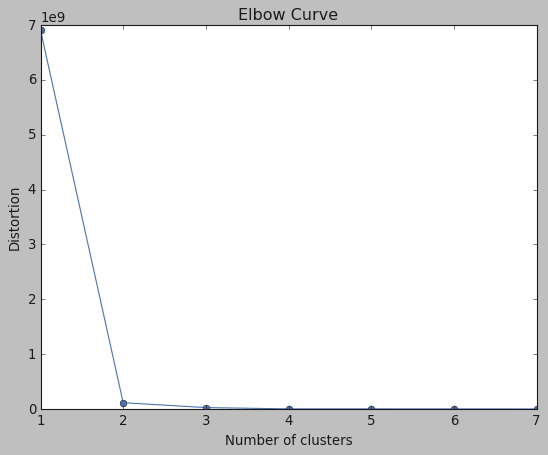

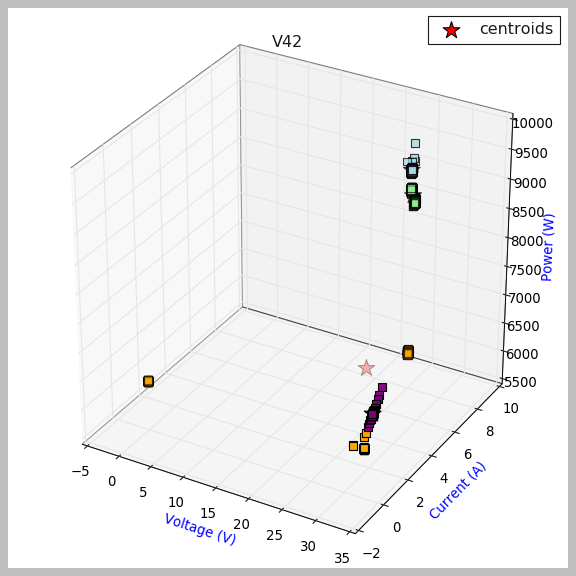

In [648]:
x = data.iloc[:, [0,3,45]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V42')
plt.show()

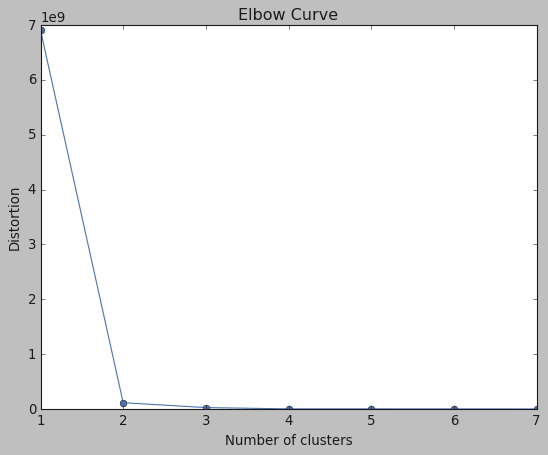

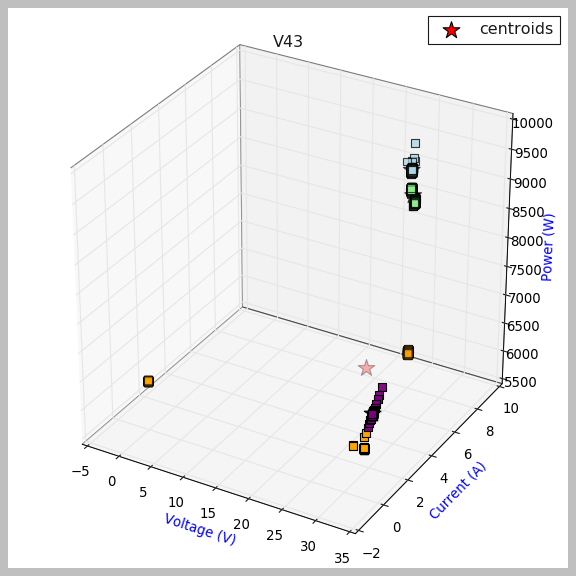

In [649]:
x = data.iloc[:, [0,3,46]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V43')
plt.show()

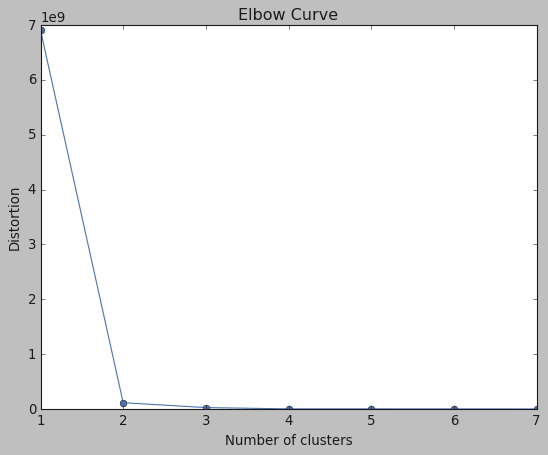

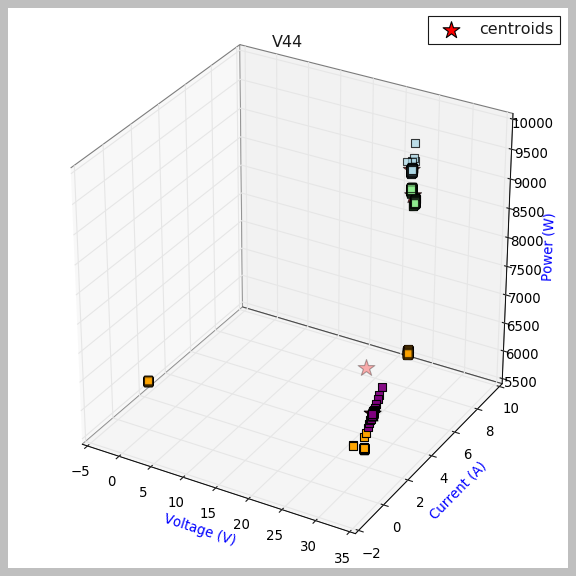

In [650]:
x = data.iloc[:, [0,3,47]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V44')
plt.show()

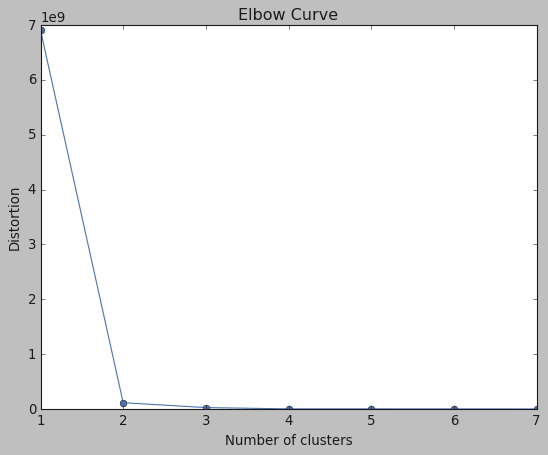

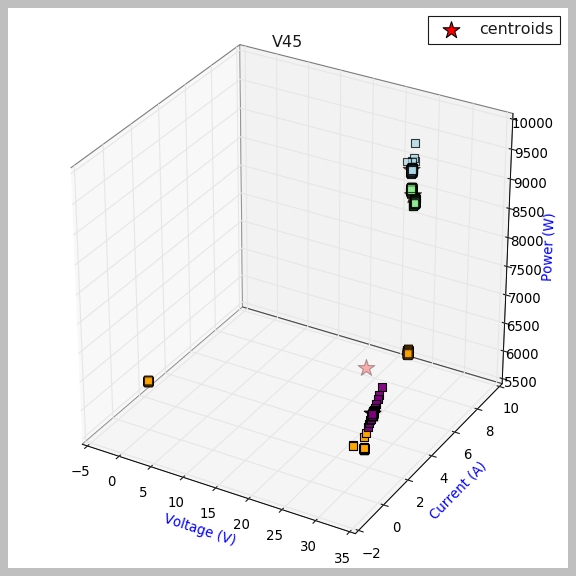

In [651]:
x = data.iloc[:, [0,3,48]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V45')
plt.show()

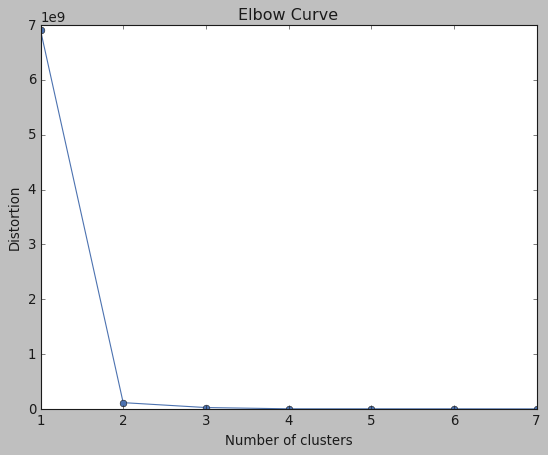

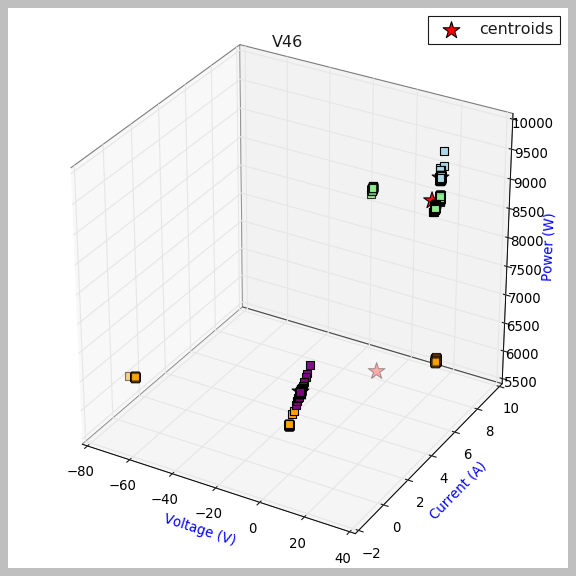

In [652]:
x = data.iloc[:, [0,3,49]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V46')
plt.show()

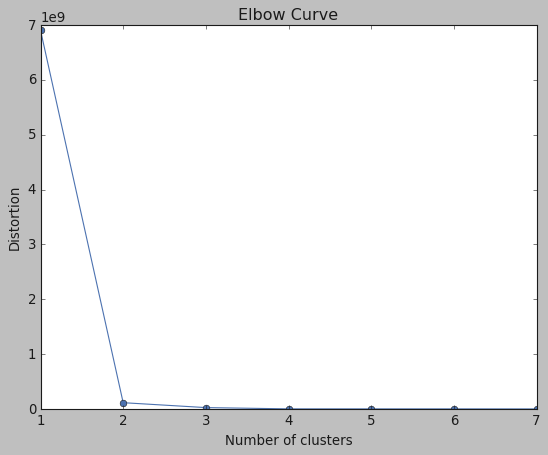

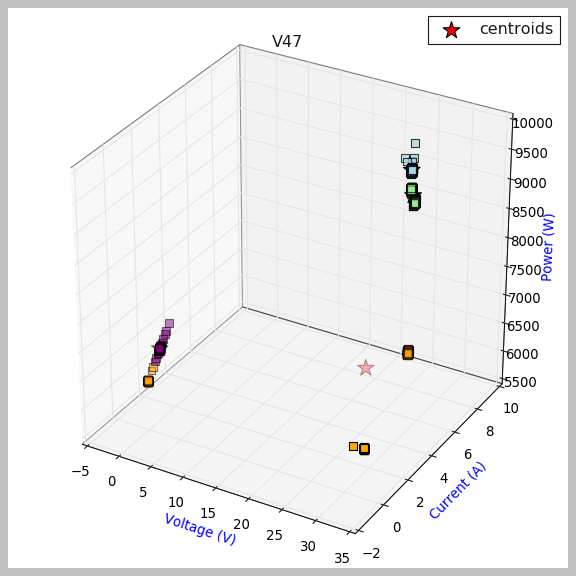

In [653]:
x = data.iloc[:, [0,3,50]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V47')
plt.show()

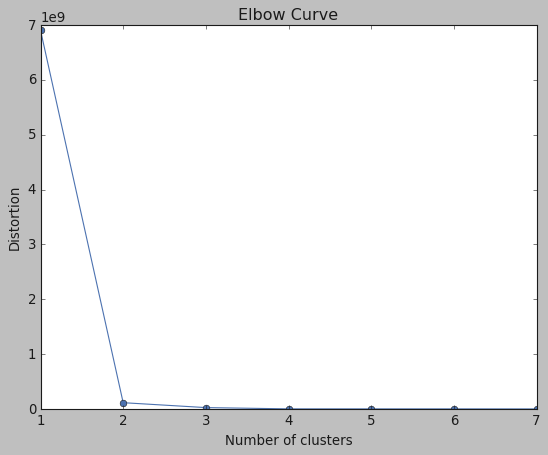

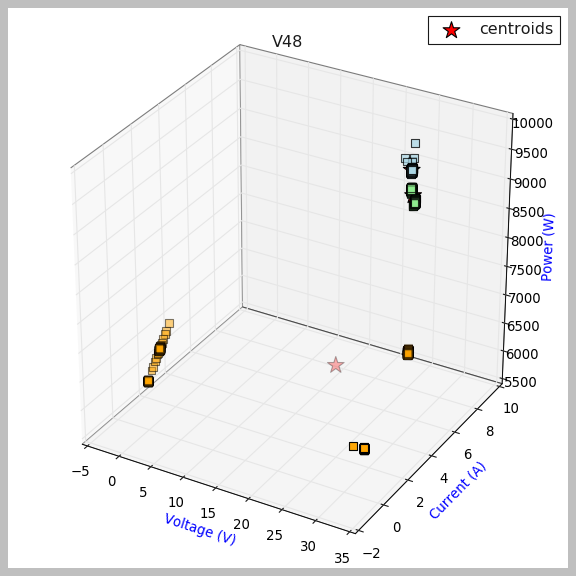

In [624]:
x = data.iloc[:, [0,3,51]]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#####################################################
km = KMeans(
    n_clusters=3, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
labels = km.fit_predict(x)
#####################################################
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 2], x.iloc[:, 1], x.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], 
           km.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('V48')
plt.show()

# Algorithm T-sne

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

In [299]:
data = pd.read_csv('data.csv')
print(str(data.shape))
data.head()

(4478, 52)


Power        I1        I2        I3         V1         V2         V3  \
0  9751.855054  7.824120  7.711217  7.659327  26.981230  26.981230  26.973406   
1  9327.646501  7.493863  7.377357  7.315667  26.595084  26.590496  26.581026   
2  9343.714000  7.504908  7.394960  7.328464  26.558807  26.554412  26.545014   
3  9344.852760  7.505353  7.400048  7.327035  26.517370  26.512969  26.503568   
4  9360.422049  7.516942  7.404808  7.343132  26.582297  26.577895  26.568483   

          V4         V5         V6         V7         V8         V9  \
0  26.981230  26.981230  26.981230  26.981230  26.981230  25.676113   
1  26.581640  26.578936  26.585754  26.587160  26.583894  26.062479   
2  26.545930  26.543340  26.549870  26.551216  26.548088  26.091001   
3  26.504474  26.501881  26.508420  26.509769  26.506636  26.129142   
4  26.569400  26.566807  26.573346  26.574695  26.571562  26.075063   

         V10        V11        V12        V13        V14        V15  \
0  25.676113  25.668289  25.676113  25.676113  25.676113  25.676113   
1  26.069642  26.060009  26.065635  26.065134  26.072235  26.070926   
2  26.097861  26.088307  26.094023  26.093544  26.100345  26.099091   
3  26.136012  26.126455  26.132169  26.131689  26.138499  26.137244   
4  26.081934  26.072365  26.078091  26.077610  26.084422  26.083166   

         V16        V17        V18        V19        V20        V21  \
0  25.676113  26.671016  26.671016  26.671016  26.671016  26.671016   
1  26.070032  26.478466  26.477668  26.476426  26.474413  26.482970   
2  26.098235  26.496072  26.495309  26.494121  26.492195  26.500382   
3  26.136387  26.511278  26.510513  26.509321  26.507391  26.515597   
4  26.082308  26.486919  26.486153  26.484961  26.483030  26.491241   

         V22        V23        V24        V25        V26        V27  \
0  26.663305  26.671016  26.671016  26.671016  26.671016  26.671016   
1  26.469285  26.475883  26.476126  26.479430  26.476434  26.489208   
2  26.486952  26.493602  26.493834  26.496995  26.494128  26.506349   
3  26.502148  26.508801  26.509034  26.512203  26.509329  26.521579   
4  26.477783  26.484440  26.484673  26.487844  26.484968  26.497227   

         V28        V29        V30        V31        V32        V33  \
0  26.671016  25.299624  25.299624  25.299624  25.299624  26.994014   
1  26.478249  25.867613  25.877451  25.868928  25.871414  26.661633   
2  26.495865  25.799716  25.809128  25.800974  25.803352  26.700060   
3  26.511070  25.747493  25.756928  25.748755  25.751138  26.732124   
4  26.486711  25.842258  25.851699  25.843520  25.845905  26.680422   

         V34        V35        V36        V37        V38        V39  \
0  26.994014  26.994014  27.049819  26.994014  26.994014  25.923836   
1  26.660812  26.669658  26.673472  26.663793  26.660827  26.130718   
2  26.699275  26.707725  26.714043  26.702123  26.699290  26.101107   
3  26.731338  26.739803  26.715153  26.734191  26.731353  26.082333   
4  26.679636  26.688099  26.670853  26.682488  26.679651  26.121293   

         V40        V41        V42        V43        V44        V45  \
0  25.923836  25.916177  25.923836  25.923836  25.923836  25.923836   
1  26.121655  26.121467  26.123370  26.125228  26.124651  26.115087   
2  26.092450  26.091930  26.094089  26.095863  26.095312  26.086177   
3  26.073660  26.073154  26.075302  26.077079  26.076527  26.067376   
4  26.112622  26.112098  26.114264  26.116041  26.115489  26.106339   

         V46        V47        V48  
0  25.916177  25.923836  25.923836  
1  26.125892  26.122222  26.119418  
2  26.096156  26.092992  26.090314  
3  26.077387  26.074203  26.071521  
4  26.116331  26.113165  26.110483

In [307]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(data)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 4478 samples in 0.013s...
[t-SNE] Computed neighbors for 4478 samples in 0.510s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4478
[t-SNE] Computed conditional probabilities for sample 2000 / 4478
[t-SNE] Computed conditional probabilities for sample 3000 / 4478
[t-SNE] Computed conditional probabilities for sample 4000 / 4478
[t-SNE] Computed conditional probabilities for sample 4478 / 4478
[t-SNE] Mean sigma: 1.546746
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.106129
[t-SNE] KL divergence after 300 iterations: 0.825544


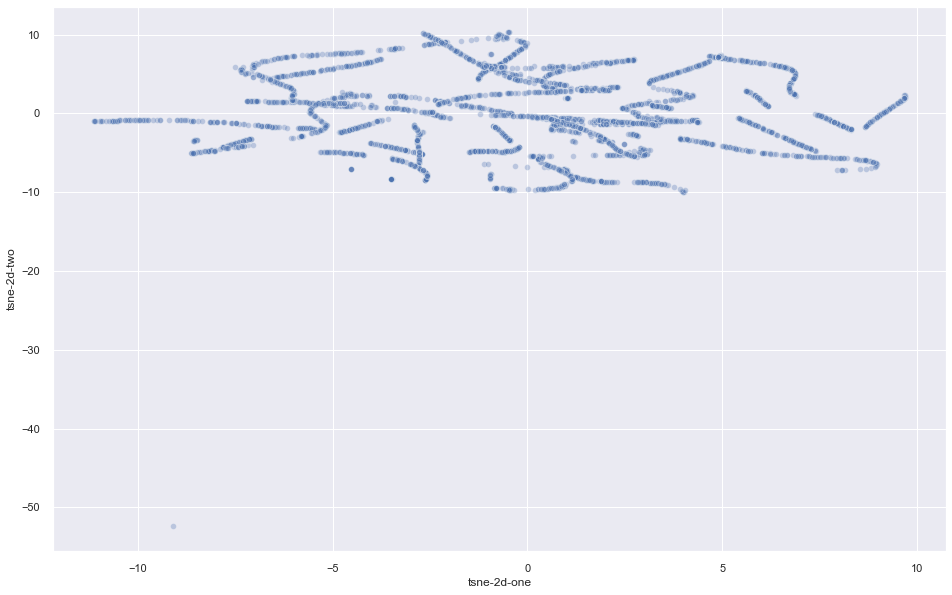

In [306]:
data['tsne-2d-one'] = tsne_results[:,0]
data['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 10),
    data=data,
    legend="full",
    alpha=0.3
)